# **🏠 부동산 실거래가 Baseline code**
> 부동산 실거래가 예측 대회에 오신 여러분 환영합니다! 🎉     
> 아래 baseline에서는 RandomForest를 활용해 ML 방법론들을 실제 대회에 적용해보도록 하겠습니다.
> 강의는 google colab으로 실행하였기에 아래의 베이스라인 코드와는 일부 차이가 있을 수 있습니다. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- 필요한 라이브러리를 불러옵니다.

In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

## 2. Data Load

#### 2.1. 데이터 로드

In [3]:
import os

In [4]:
os.getcwd()

'/root/upstage-ml-regression-3/yoon'

In [5]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = '/root/train.csv'
test_path  = '/root/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [6]:
# Train data와 Test data shape은 아래와 같습니다.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1118822 non-null  object 
 1   번지                      1118597 non-null  object 
 2   본번                      1118747 non-null  float64
 3   부번                      1118747 non-null  float64
 4   아파트명                    1116696 non-null  object 
 5   전용면적(㎡)                 1118822 non-null  float64
 6   계약년월                    1118822 non-null  int64  
 7   계약일                     1118822 non-null  int64  
 8   층                       1118822 non-null  int64  
 9   건축년도                    1118822 non-null  int64  
 10  도로명                     1118822 non-null  object 
 11  해제사유발생일                 5983 non-null     float64
 12  등기신청일자                  1118822 non-null  object 
 13  거래유형                    1118822 non-null  object 
 14  중개

In [7]:
dt.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

In [ ]:
df_bus = pd.read_csv("/root/bus_feature.csv")
df_metro = pd.read_csv("/root/subway_feature.csv")

In [ ]:
df_bus

,노드 ID,정류소번호,정류소명,X좌표,Y좌표,정류소 타입
0,100000001,1001,종로2가사거리,126.987752,37.569808,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582581,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로
...,...,...,...,...,...,...
12579,124000334,25995,우성아파트,127.139338,37.550386,일반차로
12580,124000333,25996,우성아파트,127.140046,37.550643,일반차로
12581,124000332,25997,조일약국,127.123596,37.533630,일반차로
12582,124000331,25998,성내시장,127.125497,37.536155,일반차로


In [ ]:
df_metro

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387
...,...,...,...,...,...
763,154,종로5가,1호선,37.570926,127.001849
764,153,종로3가,1호선,37.570406,126.991847
765,152,종각,1호선,37.570161,126.982923
766,151,시청,1호선,37.565715,126.977088


### 공공주택에 대한 가정 체크
- 작업자 : 정혜윤

In [8]:
k_rel_cols = ['k-단지분류(아파트,주상복합등등)',
    'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
    'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
    'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
    'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
    'k-등록일자', 'k-수정일자']

In [9]:
dt["k-전용면적별세대현황(60㎡이하)"].isnull().sum()

869608

In [10]:
dt_k_area_isnull = dt[dt['k-전용면적별세대현황(60㎡이하)'].isnull()][k_rel_cols]

In [11]:
dt_k_area_isnull

,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,...,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자
975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dt_k_area_isnull.notnull().sum()

k-단지분류(아파트,주상복합등등)         0
k-전화번호                    45
k-팩스번호                    45
단지소개기존clob                 0
k-세대타입(분양형태)              45
k-관리방식                    45
k-복도유형                    45
k-난방방식                    45
k-전체동수                    45
k-전체세대수                   45
k-건설사(시공사)                45
k-시행사                      0
k-사용검사일-사용승인일             45
k-연면적                     45
k-주거전용면적                   0
k-관리비부과면적                 45
k-전용면적별세대현황(60㎡이하)         0
k-전용면적별세대현황(60㎡~85㎡이하)     0
k-85㎡~135㎡이하               0
k-135㎡초과                   0
k-홈페이지                     0
k-등록일자                     0
k-수정일자                     0
dtype: int64

In [13]:
dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].notnull().sum()

k-단지분류(아파트,주상복합등등)        0
단지소개기존clob                0
k-시행사                     0
k-주거전용면적                  0
k-전용면적별세대현황(60㎡이하)        0
k-전용면적별세대현황(60㎡~85㎡이하)    0
k-85㎡~135㎡이하              0
k-135㎡초과                  0
k-홈페이지                    0
k-등록일자                    0
k-수정일자                    0
dtype: int64

In [14]:
dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].columns

Index(['k-단지분류(아파트,주상복합등등)', '단지소개기존clob', 'k-시행사', 'k-주거전용면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자'],
      dtype='object')

In [15]:
dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() != 0].notnull().sum()

k-전화번호           45
k-팩스번호           45
k-세대타입(분양형태)     45
k-관리방식           45
k-복도유형           45
k-난방방식           45
k-전체동수           45
k-전체세대수          45
k-건설사(시공사)       45
k-사용검사일-사용승인일    45
k-연면적            45
k-관리비부과면적        45
dtype: int64

In [16]:
dt_k_area_notnull = dt[dt['k-전용면적별세대현황(60㎡이하)'].notnull()][k_rel_cols]

In [17]:
dt_k_area_notnull

,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,...,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자
0,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0
1,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0
2,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0
3,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0
4,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,아파트,23547358.0,23529429.0,NaN,분양,위탁관리,혼합식,개별난방,4.0,366.0,...,45515.0,28335.0,28335.0,171.0,141.0,54.0,NaN,NaN,NaN,2023-09-26 07:15:20.0
1118818,아파트,23547358.0,23529429.0,NaN,분양,위탁관리,혼합식,개별난방,4.0,366.0,...,45515.0,28335.0,28335.0,171.0,141.0,54.0,NaN,NaN,NaN,2023-09-26 07:15:20.0
1118819,아파트,23547358.0,23529429.0,NaN,분양,위탁관리,혼합식,개별난방,4.0,366.0,...,45515.0,28335.0,28335.0,171.0,141.0,54.0,NaN,NaN,NaN,2023-09-26 07:15:20.0
1118820,아파트,23547358.0,23529429.0,NaN,분양,위탁관리,혼합식,개별난방,4.0,366.0,...,45515.0,28335.0,28335.0,171.0,141.0,54.0,NaN,NaN,NaN,2023-09-26 07:15:20.0


In [18]:
dt_k_area_notnull.isnull().sum()

k-단지분류(아파트,주상복합등등)          1083
k-전화번호                       711
k-팩스번호                      3179
단지소개기존clob                180632
k-세대타입(분양형태)                   0
k-관리방식                         0
k-복도유형                       327
k-난방방식                         0
k-전체동수                      1067
k-전체세대수                        0
k-건설사(시공사)                  1495
k-시행사                       1646
k-사용검사일-사용승인일                133
k-연면적                          0
k-주거전용면적                       0
k-관리비부과면적                      0
k-전용면적별세대현황(60㎡이하)             0
k-전용면적별세대현황(60㎡~85㎡이하)         0
k-85㎡~135㎡이하                   0
k-135㎡초과                  248887
k-홈페이지                    136039
k-등록일자                    238224
k-수정일자                         0
dtype: int64

In [19]:
dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() == 0]

,k-세대타입(분양형태),k-관리방식,k-난방방식,k-전체세대수,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-수정일자
0,분양,자치관리,개별난방,270.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,2023-09-23 17:21:41.0
1,분양,자치관리,개별난방,270.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,2023-09-23 17:21:41.0
2,분양,자치관리,개별난방,270.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,2023-09-23 17:21:41.0
3,분양,자치관리,개별난방,270.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,2023-09-23 17:21:41.0
4,분양,자치관리,개별난방,270.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,2023-09-23 17:21:41.0
...,...,...,...,...,...,...,...,...,...,...,...
1118817,분양,위탁관리,개별난방,366.0,45515.0,28335.0,28335.0,171.0,141.0,54.0,2023-09-26 07:15:20.0
1118818,분양,위탁관리,개별난방,366.0,45515.0,28335.0,28335.0,171.0,141.0,54.0,2023-09-26 07:15:20.0
1118819,분양,위탁관리,개별난방,366.0,45515.0,28335.0,28335.0,171.0,141.0,54.0,2023-09-26 07:15:20.0
1118820,분양,위탁관리,개별난방,366.0,45515.0,28335.0,28335.0,171.0,141.0,54.0,2023-09-26 07:15:20.0


In [20]:
dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() == 0].isnull().sum()

k-세대타입(분양형태)              0
k-관리방식                    0
k-난방방식                    0
k-전체세대수                   0
k-연면적                     0
k-주거전용면적                  0
k-관리비부과면적                 0
k-전용면적별세대현황(60㎡이하)        0
k-전용면적별세대현황(60㎡~85㎡이하)    0
k-85㎡~135㎡이하              0
k-수정일자                    0
dtype: int64

In [21]:
cols_to_check = dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].columns.tolist()

In [22]:
dt_k_area_notnull[cols_to_check].isnull().sum()

k-단지분류(아파트,주상복합등등)          1083
단지소개기존clob                180632
k-시행사                       1646
k-주거전용면적                       0
k-전용면적별세대현황(60㎡이하)             0
k-전용면적별세대현황(60㎡~85㎡이하)         0
k-85㎡~135㎡이하                   0
k-135㎡초과                  248887
k-홈페이지                    136039
k-등록일자                    238224
k-수정일자                         0
dtype: int64

In [23]:
dt_k_area_notnull.shape

(249214, 23)

In [24]:
dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].columns

Index(['k-단지분류(아파트,주상복합등등)', '단지소개기존clob', 'k-시행사', 'k-주거전용면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자'],
      dtype='object')

In [25]:
dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() == 0].columns

Index(['k-세대타입(분양형태)', 'k-관리방식', 'k-난방방식', 'k-전체세대수', 'k-연면적', 'k-주거전용면적',
       'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-수정일자'],
      dtype='object')

In [26]:
cols_to_use = []
for col in dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].columns.tolist():
    if col in dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() == 0].columns.tolist():
        cols_to_use.append(col)

In [27]:
cols_to_use

['k-주거전용면적',
 'k-전용면적별세대현황(60㎡이하)',
 'k-전용면적별세대현황(60㎡~85㎡이하)',
 'k-85㎡~135㎡이하',
 'k-수정일자']

### 등기정보 및 x좌표 y좌표 체크

In [28]:
dt.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

In [32]:
basic_cols = ['시군구', '번지', '본번', '부번', '아파트명', 'target']

In [33]:
cols_except_k = []
for col in dt.columns.tolist():
    if (col not in k_rel_cols) & (col not in basic_cols):
        cols_except_k.append(col)  

In [34]:
cols_except_k

['전용면적(㎡)',
 '계약년월',
 '계약일',
 '층',
 '건축년도',
 '도로명',
 '해제사유발생일',
 '등기신청일자',
 '거래유형',
 '중개사소재지',
 '고용보험관리번호',
 '경비비관리형태',
 '세대전기계약방법',
 '청소비관리형태',
 '건축면적',
 '주차대수',
 '기타/의무/임대/임의=1/2/3/4',
 '단지승인일',
 '사용허가여부',
 '관리비 업로드',
 '좌표X',
 '좌표Y',
 '단지신청일']

In [35]:
dt[cols_except_k].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   전용면적(㎡)              1118822 non-null  float64
 1   계약년월                 1118822 non-null  int64  
 2   계약일                  1118822 non-null  int64  
 3   층                    1118822 non-null  int64  
 4   건축년도                 1118822 non-null  int64  
 5   도로명                  1118822 non-null  object 
 6   해제사유발생일              5983 non-null     float64
 7   등기신청일자               1118822 non-null  object 
 8   거래유형                 1118822 non-null  object 
 9   중개사소재지               1118822 non-null  object 
 10  고용보험관리번호             205518 non-null   object 
 11  경비비관리형태              247834 non-null   object 
 12  세대전기계약방법             240075 non-null   object 
 13  청소비관리형태              247644 non-null   object 
 14  건축면적                 249108 non-null   float64
 15

In [36]:
dt[cols_except_k].isnull().sum()

전용면적(㎡)                      0
계약년월                         0
계약일                          0
층                            0
건축년도                         0
도로명                          0
해제사유발생일                1112839
등기신청일자                       0
거래유형                         0
중개사소재지                       0
고용보험관리번호                913304
경비비관리형태                 870988
세대전기계약방법                878747
청소비관리형태                 871178
건축면적                    869714
주차대수                    869714
기타/의무/임대/임의=1/2/3/4     869563
단지승인일                   870286
사용허가여부                  869563
관리비 업로드                 869563
좌표X                     869670
좌표Y                     869670
단지신청일                   869625
dtype: int64

In [38]:
dt[cols_except_k].loc[:, dt[cols_except_k].isnull().sum() == 0].isnull().sum()

전용면적(㎡)    0
계약년월       0
계약일        0
층          0
건축년도       0
도로명        0
등기신청일자     0
거래유형       0
중개사소재지     0
dtype: int64

In [39]:
dt[cols_except_k].loc[:, dt[cols_except_k].isnull().sum() == 0].isnull().sum().index.tolist()

['전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '도로명', '등기신청일자', '거래유형', '중개사소재지']

In [46]:
private_apt = dt[dt["k-전용면적별세대현황(60㎡이하)"].isnull()]

In [47]:
public_apt = dt[dt["k-전용면적별세대현황(60㎡이하)"].notnull()]

In [52]:
private_apt[['도로명', '좌표X', '좌표Y']]

,도로명,좌표X,좌표Y
975,삼성로 14,NaN,NaN
976,삼성로 14,NaN,NaN
977,삼성로 14,NaN,NaN
978,삼성로 14,NaN,NaN
979,삼성로 14,NaN,NaN
...,...,...,...
1118203,동일로144길 74,NaN,NaN
1118204,봉화산로27가길 23,NaN,NaN
1118205,봉화산로27가길 23,NaN,NaN
1118206,봉화산로27가길 23,NaN,NaN


In [53]:
public_apt[['도로명', '좌표X', '좌표Y']]

,도로명,좌표X,좌표Y
0,언주로 3,127.057210,37.476763
1,언주로 3,127.057210,37.476763
2,언주로 3,127.057210,37.476763
3,언주로 3,127.057210,37.476763
4,언주로 3,127.057210,37.476763
...,...,...,...
1118817,서오릉로21길 36,126.905638,37.612962
1118818,서오릉로21길 36,126.905638,37.612962
1118819,서오릉로21길 36,126.905638,37.612962
1118820,서오릉로21길 36,126.905638,37.612962


In [58]:
private_apt[['도로명', '좌표X', '좌표Y', '아파트명']].isnull().sum()

도로명          0
좌표X     869608
좌표Y     869608
아파트명      2126
dtype: int64

In [59]:
public_apt[['도로명', '좌표X', '좌표Y', '아파트명']].isnull().sum()

도로명      0
좌표X     62
좌표Y     62
아파트명     0
dtype: int64

In [63]:
seoul_apt = pd.read_csv("/root/seoul_apt.csv", encoding='euc-kr' )

In [64]:
seoul_apt

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시도)k-apt주소split,주소(시군구),주소(읍면동),나머지주소,주소(도로명),...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,1,A15679103,우리유앤미,아파트,서울특별시 동작구 서달로 83,서울,동작구,흑석동,우리유앤미아파트,서달로,...,위탁,1773.56,223.0,의무,2018-04-10 15:59:42.0,Y,N,126.9596386,37.500668,2013-03-07 09:46:59.0
1,2,A13876112,송파파인타운13단지,아파트,서울특별시 송파구 송파대로8길 10,서울,송파구,장지동,857,송파대로8길,...,위탁,0.00,225.0,의무,2013-06-17 19:03:30.0,Y,N,127.1291789,37.476897,2013-03-07 09:46:59.0
2,3,A13873701,오금현대백조(임대),아파트,서울특별시 송파구 양재대로72길 20,서울,송파구,오금동,20-2,양재대로72길,...,위탁,6892.79,60.0,임의,2013-11-21 16:43:07.0,Y,N,127.1287745,37.508906,2013-03-07 09:46:59.0
3,4,A15275101,개봉건영,아파트,서울특별시 구로구 고척로21나길 85-6,서울,구로구,개봉동,47-1,고척로21나길,...,위탁,0.00,0.0,의무,2013-06-23 11:30:23.0,Y,N,126.8406749,37.501162,2013-03-07 09:46:59.0
4,6,A13991016,월계동원베네스트,아파트,서울특별시 노원구 월계로53길 21,서울,노원구,월계동,서울시 노원구 월계2동 940번지,월계로53길,...,위탁,0.00,206.0,의무,2015-06-19 09:59:49.0,Y,N,127.0582196,37.631732,2013-03-07 09:46:59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,40380,A10022928,강서금호어울림퍼스티어,아파트,서울특별시 강서구 화곡로54길 43,서울,강서구,화곡동,NaN,화곡로54길,...,위탁,4693.06,636.0,의무,2023-12-07 18:13:41.0,Y,N,126.8510647,37.550706,2023-12-07 17:14:49.0
2774,40386,A10022851,힐스테이트리슈빌강일,아파트,서울특별시 강동구 아리수로93다길 80,서울,강동구,강일동,NaN,아리수로93다길,...,위탁,15486.00,1086.0,의무,2024-01-11 13:47:18.0,Y,N,127.1748062,37.573716,2024-01-11 13:34:05.0
2775,40387,A10022859,디에이치퍼스티어아이파크,NaN,서울특별시 강남구 개포로 310,서울,강남구,개포동,NaN,개포로,...,위탁,58447.72,13154.0,의무,2024-01-09 10:10:41.0,Y,N,127.0578480,37.480287,2024-01-09 09:45:49.0
2776,40394,A10022761,힐스테이트 남산,NaN,서울특별시 중구 퇴계로46길 26,서울,중구,묵정동,NaN,퇴계로46길,...,위탁,2982.98,302.0,의무,2024-03-12 09:08:34.0,Y,N,126.9994370,37.561678,2024-03-11 18:59:26.0


In [67]:
private_apt['아파트명'].nunique()

5856

In [68]:
private_apt['도로명'].nunique()

8440

In [65]:
public_apt['아파트명'].nunique()

735

In [66]:
public_apt['도로명'].nunique()

833

In [69]:
seoul_building = pd.read_csv("/root/seoul_building_info.csv", encoding='euc-kr')

In [70]:
seoul_building

,관리_건축물대장_PK,관리_상위_건축물대장_PK,대장_구분_코드,대장_종류_코드,시군구_코드,법정동_코드,대지_구분_코드,번,지,특수지_명,...,대장_일련번호,총괄표제부_일련번호,표제부_일련번호,전유부_일련번호,새주소_도로_코드,새주소_법정동_코드,새주소_지상지하_코드,새주소_본_번,새주소_부_번,변동_일자
0,11170-79437,11170-22953,집합,전유부,용산구,한강로3가,대지,63,387,NaN,...,85,1.0,1.0,85,서울특별시 용산구 서빙고로,한강로3가,지상,31.0,NaN,20240321
1,11470-14041,NaN,일반,일반건축물,양천구,신월동,대지,29,10,NaN,...,390,1.0,390.0,0,서울특별시 양천구 남부순환로29길,신월동,지상,5.0,0.0,20240321
2,11200-1000000000000002581585,11200-1000000000000002578681,집합,전유부,성동구,성수동1가,대지,685,696,NaN,...,82,1.0,1.0,82,서울특별시 성동구 서울숲2길,성수동1가,지상,32.0,14.0,20240321
3,11200-8658,NaN,일반,일반건축물,성동구,행당동,대지,37,52,NaN,...,1,1.0,1.0,0,서울특별시 성동구 살곶이6길,행당동,지상,3.0,0.0,20240321
4,11215-76951,11215-20734,집합,전유부,광진구,자양동,대지,783,1,NaN,...,1450,1.0,10.0,1450,서울특별시 광진구 아차산로36길,자양동,지상,39.0,NaN,20240321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443605,11530-97187,11530-10578,집합,전유부,구로구,구로동,대지,107,1,NaN,...,11,1.0,1.0,11,서울특별시 구로구 공원로,구로동,지상,27.0,NaN,20220104
1443606,11305-27288,NaN,일반,일반건축물,강북구,수유동,대지,596,17,NaN,...,10,1.0,10.0,0,서울특별시 강북구 4.19로12길,수유동,지상,29.0,0.0,20220104
1443607,11530-97188,11530-10578,집합,전유부,구로구,구로동,대지,107,1,NaN,...,13,1.0,1.0,13,서울특별시 구로구 공원로,구로동,지상,27.0,NaN,20220104
1443608,11530-97182,11530-10578,집합,전유부,구로구,구로동,대지,107,1,NaN,...,5,1.0,1.0,5,서울특별시 구로구 공원로,구로동,지상,27.0,NaN,20220104


In [71]:
seoul_building.columns

Index(['관리_건축물대장_PK', '관리_상위_건축물대장_PK', '대장_구분_코드', '대장_종류_코드', '시군구_코드',
       '법정동_코드', '대지_구분_코드', '번', '지', '특수지_명', '블록', '로트', '건물_명',
       '위반_건축물_여부', '대장_일련번호', '총괄표제부_일련번호', '표제부_일련번호', '전유부_일련번호',
       '새주소_도로_코드', '새주소_법정동_코드', '새주소_지상지하_코드', '새주소_본_번', '새주소_부_번',
       '변동_일자'],
      dtype='object')

In [74]:
seoul_building[['새주소_도로_코드', '새주소_본_번', '새주소_부_번']]

,새주소_도로_코드,새주소_본_번,새주소_부_번
0,서울특별시 용산구 서빙고로,31.0,NaN
1,서울특별시 양천구 남부순환로29길,5.0,0.0
2,서울특별시 성동구 서울숲2길,32.0,14.0
3,서울특별시 성동구 살곶이6길,3.0,0.0
4,서울특별시 광진구 아차산로36길,39.0,NaN
...,...,...,...
1443605,서울특별시 구로구 공원로,27.0,NaN
1443606,서울특별시 강북구 4.19로12길,29.0,0.0
1443607,서울특별시 구로구 공원로,27.0,NaN
1443608,서울특별시 구로구 공원로,27.0,NaN


In [72]:
seoul_building.head(10)

,관리_건축물대장_PK,관리_상위_건축물대장_PK,대장_구분_코드,대장_종류_코드,시군구_코드,법정동_코드,대지_구분_코드,번,지,특수지_명,...,대장_일련번호,총괄표제부_일련번호,표제부_일련번호,전유부_일련번호,새주소_도로_코드,새주소_법정동_코드,새주소_지상지하_코드,새주소_본_번,새주소_부_번,변동_일자
0,11170-79437,11170-22953,집합,전유부,용산구,한강로3가,대지,63,387,NaN,...,85,1.0,1.0,85,서울특별시 용산구 서빙고로,한강로3가,지상,31.0,NaN,20240321
1,11470-14041,NaN,일반,일반건축물,양천구,신월동,대지,29,10,NaN,...,390,1.0,390.0,0,서울특별시 양천구 남부순환로29길,신월동,지상,5.0,0.0,20240321
2,11200-1000000000000002581585,11200-1000000000000002578681,집합,전유부,성동구,성수동1가,대지,685,696,NaN,...,82,1.0,1.0,82,서울특별시 성동구 서울숲2길,성수동1가,지상,32.0,14.0,20240321
3,11200-8658,NaN,일반,일반건축물,성동구,행당동,대지,37,52,NaN,...,1,1.0,1.0,0,서울특별시 성동구 살곶이6길,행당동,지상,3.0,0.0,20240321
4,11215-76951,11215-20734,집합,전유부,광진구,자양동,대지,783,1,NaN,...,1450,1.0,10.0,1450,서울특별시 광진구 아차산로36길,자양동,지상,39.0,NaN,20240321
5,11470-18195,NaN,일반,일반건축물,양천구,목동,대지,524,1,NaN,...,10,1.0,10.0,0,서울특별시 양천구 목동중앙북로,목동,지상,112.0,NaN,20240321
6,11200-1000000000000002581822,11200-1000000000000002578681,집합,전유부,성동구,성수동1가,대지,685,696,NaN,...,93,1.0,1.0,93,서울특별시 성동구 서울숲2길,성수동1가,지상,32.0,14.0,20240321
7,11215-77112,11215-20734,집합,전유부,광진구,자양동,대지,783,1,NaN,...,50,1.0,10.0,50,서울특별시 광진구 아차산로36길,자양동,지상,39.0,NaN,20240321
8,11200-1000000000000002746179,11200-1000000000000002746175,집합,전유부,성동구,성수동1가,대지,13,266,NaN,...,5,1.0,1.0,5,서울특별시 성동구 상원6나길,성수동1가,지상,30.0,0.0,20240321
9,11470-21518,NaN,일반,일반건축물,양천구,목동,대지,795,1,NaN,...,10,1.0,10.0,0,서울특별시 양천구 목동중앙서로,목동,지상,12.0,0.0,20240321


In [73]:
seoul_building["대장_종류_코드"].unique()

array(['전유부', '일반건축물', '총괄표제부', '표제부', nan], dtype=object)

In [ ]:
import requests
apiurl = "https://api.vworld.kr/req/address?"
params = {
    "service": "address",
    "request": "getcoord",
    "crs": "epsg:4326",
    "address": "판교로 242",
    "format": "json",
    "type": "road",
    "key": "[인증키]"
}
response = requests.get(apiurl, params=params)
if response.status_code == 200:
    print(response.json())

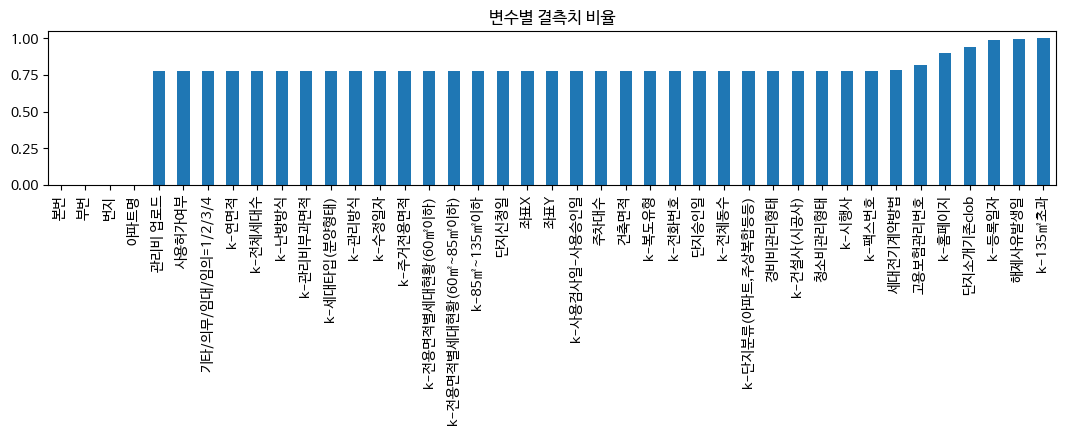

In [15]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = dt.isnull().sum() / dt.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title('변수별 결측치 비율')
plt.show()

In [18]:
def info_df(df):
    temp_df = pd.DataFrame()
    temp_df['col_name'] = df.columns
    

    for i in range(len(df.columns)):
        x = df.iloc[:, i]
        temp_df.loc[i, 'data_type'] = x.dtype
        temp_df.loc[i, 'have_null'] = any(x.isna())
        temp_df.loc[i, 'null_count'] = x.isna().sum()
        temp_df.loc[i, 'null_ratio'] = x.isna().sum() / x.shape[0]
        temp_df.loc[i, 'nunique'] = x.nunique()
    return temp_df

In [19]:
info_df(dt)

,col_name,data_type,have_null,null_count,null_ratio,nunique
0,시군구,object,False,0.0,0.000000,339.0
1,번지,object,True,225.0,0.000201,6572.0
2,본번,float64,True,75.0,0.000067,1523.0
3,부번,float64,True,75.0,0.000067,329.0
4,아파트명,object,True,2126.0,0.001900,6538.0
5,전용면적(㎡),float64,False,0.0,0.000000,14617.0
6,계약년월,int64,False,0.0,0.000000,198.0
7,계약일,int64,False,0.0,0.000000,31.0
8,층,int64,False,0.0,0.000000,73.0
9,건축년도,int64,False,0.0,0.000000,60.0


In [20]:
info_data = info_df(dt)

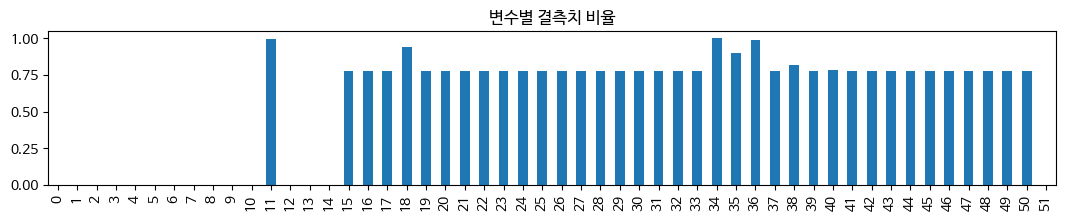

In [24]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
info_data['null_ratio'].plot.bar()
plt.title('변수별 결측치 비율')
plt.show()

In [26]:
dt.groupby("시군구")["target"].mean().sort_values(ascending=False)

시군구
서울특별시 종로구 신문로2가      329833.333333
서울특별시 중구 장충동1가       255131.818182
서울특별시 강남구 압구정동       203222.949968
서울특별시 용산구 용산동5가      188139.910569
서울특별시 종로구 홍파동        170336.419753
                         ...      
서울특별시 영등포구 영등포동4가     13926.136364
서울특별시 서대문구 미근동        13084.848485
서울특별시 영등포구 영등포동3가     11530.827068
서울특별시 성북구 안암동5가       11300.000000
서울특별시 중구 장충동2가         8530.128205
Name: target, Length: 339, dtype: float64

In [27]:
mean_val_by_dong = dt.groupby("시군구")["target"].mean().sort_values(ascending=False)

In [32]:
mean_val_by_dong.to_csv('동별평균가.csv')

Text(0.5, 1.0, '동별 평균가')

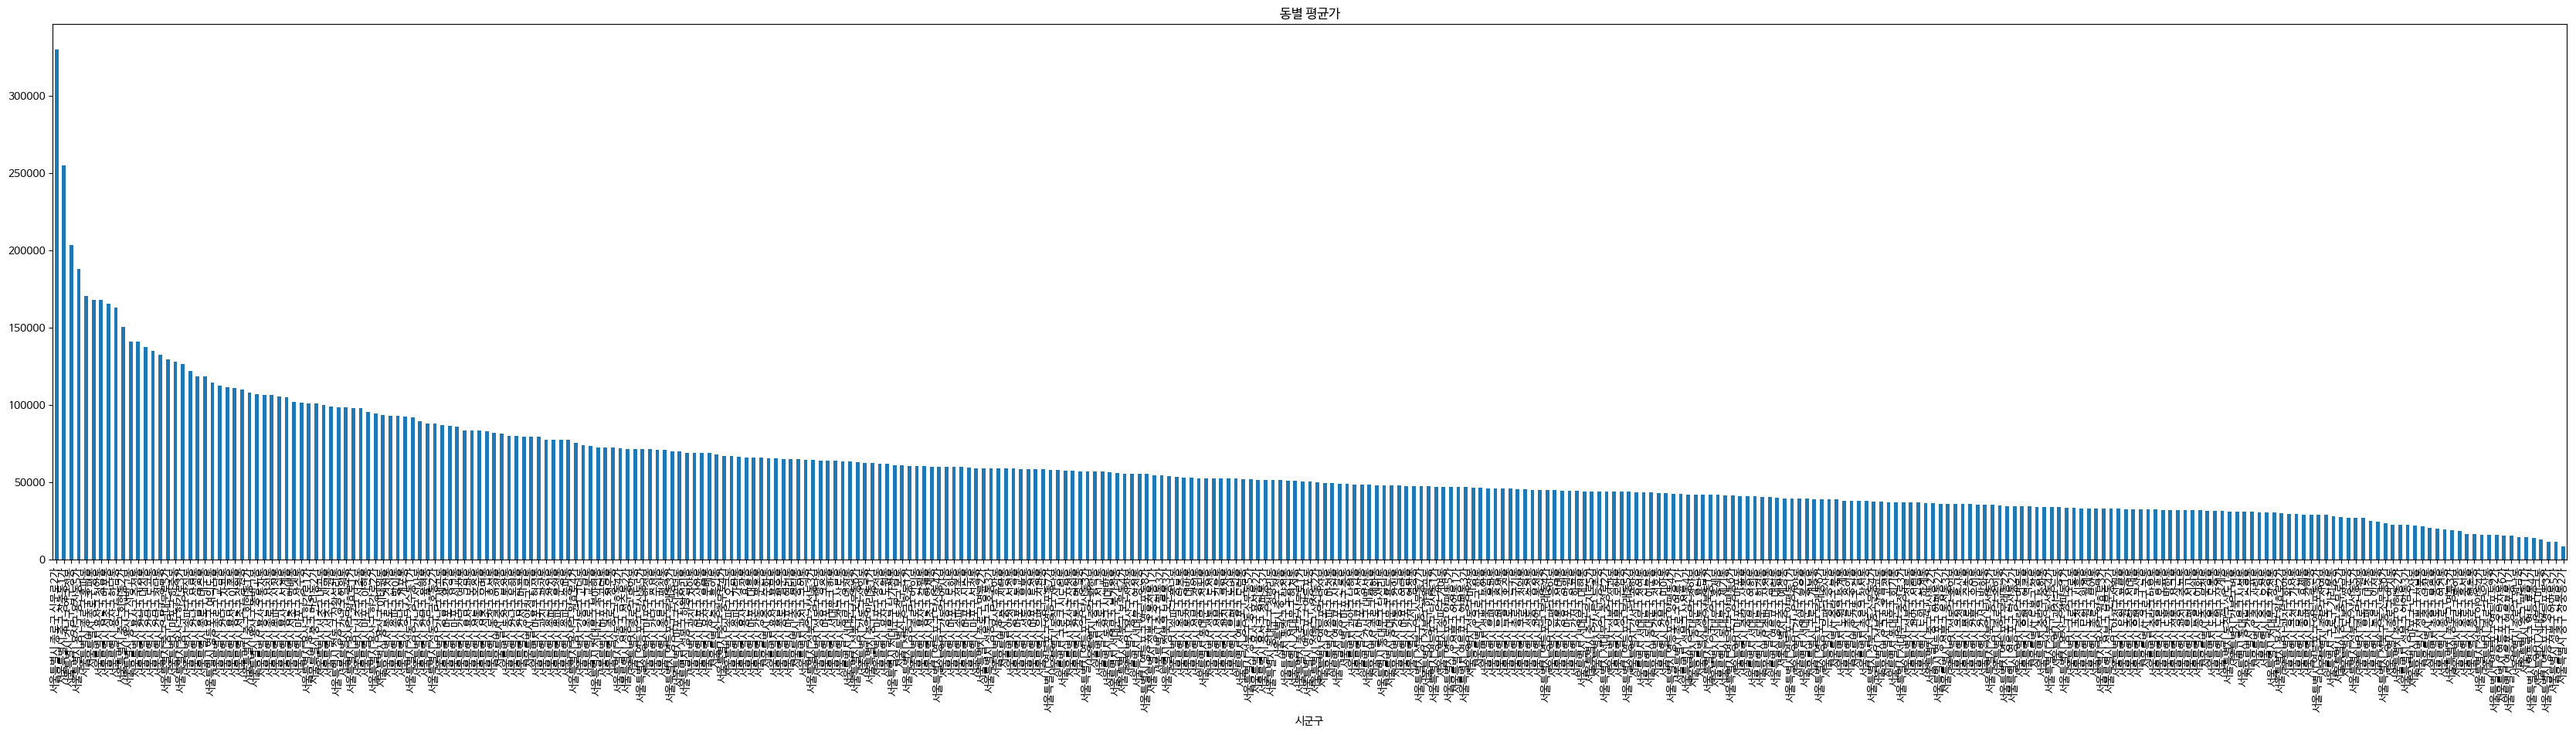

In [31]:
plt.figure(figsize=(42, 9))
mean_val_by_dong.plot.bar()
plt.title("동별 평균가")

In [33]:
dt['구'] = dt['시군구'].map(lambda x : x.split()[1])

In [35]:
dt.groupby("구")["target"].mean().sort_values(ascending=False)

구
강남구     114847.461503
서초구     113608.653390
용산구     105876.961900
송파구      83868.032920
성동구      68924.389400
광진구      67158.379293
마포구      64445.226137
중구       62084.985733
동작구      60936.451058
양천구      59042.132927
종로구      57674.032963
영등포구     56137.342464
강동구      54402.872801
서대문구     49082.573688
동대문구     45194.761822
성북구      45117.779038
강서구      44215.453701
은평구      43721.691848
관악구      41954.133039
구로구      38605.012447
강북구      38316.975201
중랑구      35195.762819
노원구      33870.444730
금천구      33709.248647
도봉구      31924.613711
Name: target, dtype: float64

In [34]:
mean_val_by_gu = dt.groupby("구")["target"].mean().sort_values(ascending=False)

In [39]:
mean_val_by_gu.to_csv("구별평균가.csv")

Text(0.5, 1.0, '구별 평균가')

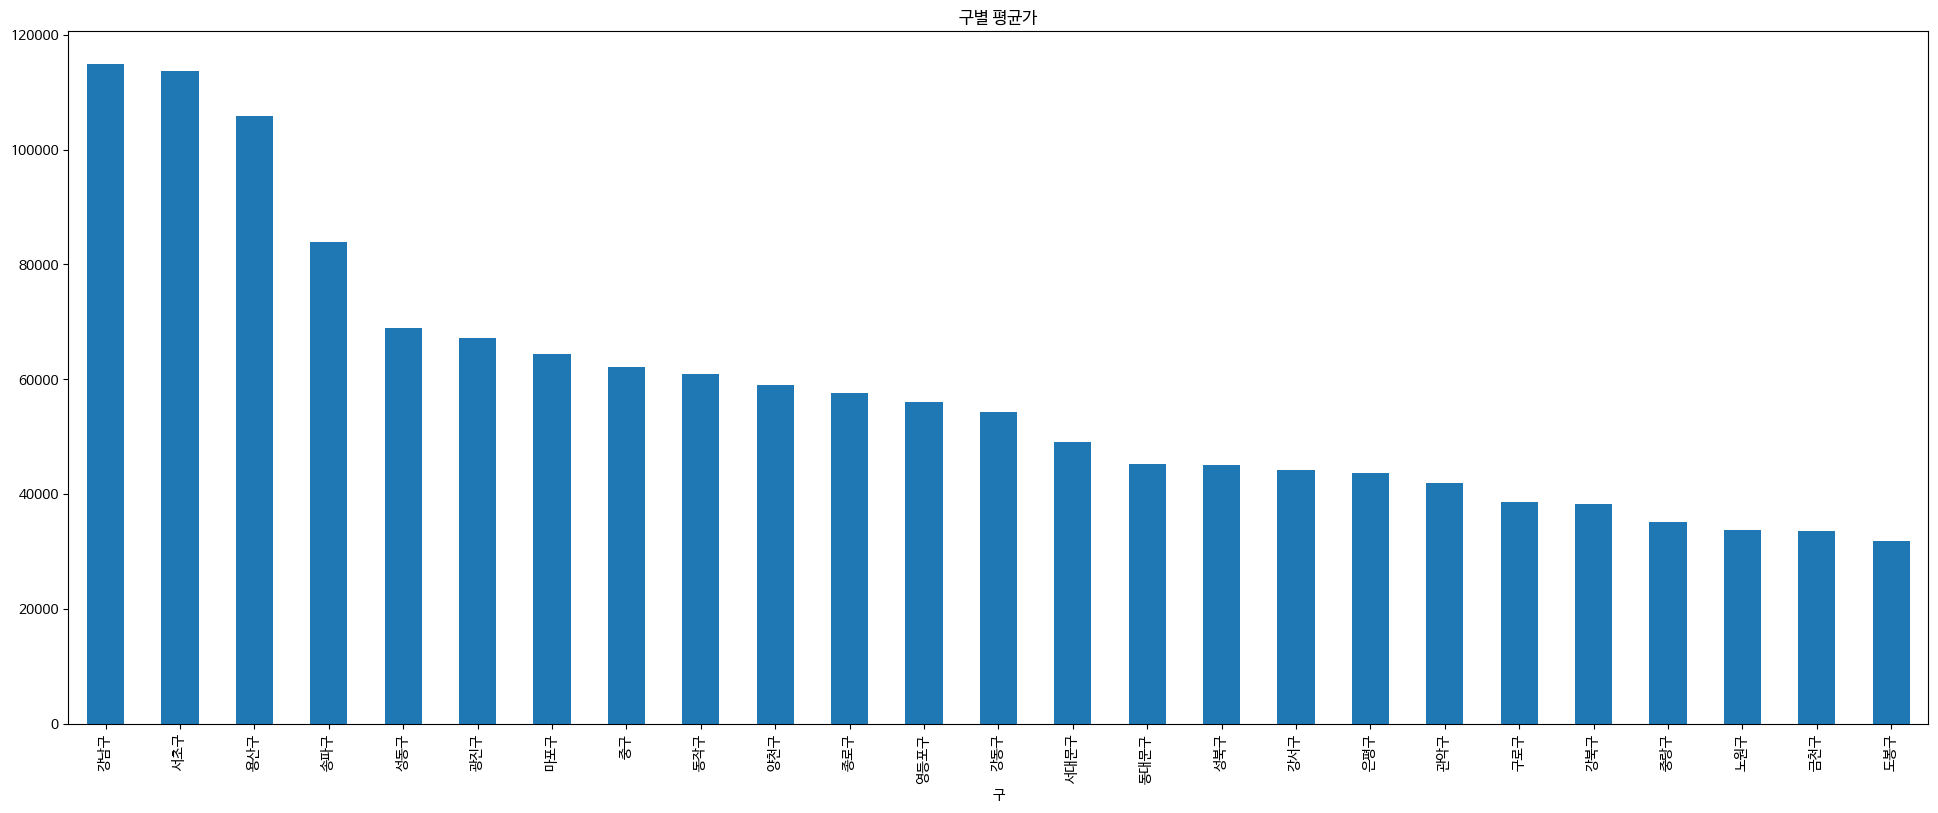

In [40]:
plt.figure(figsize=(24, 9))
mean_val_by_gu.plot.bar()
plt.title("구별 평균가")

In [38]:
dt["구"].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [45]:
type(dt["구"].unique())

numpy.ndarray

In [47]:
list_of_gu = dt["구"].unique().tolist()

In [56]:
len(list_of_gu)

25

<Axes: xlabel='target', ylabel='Count'>

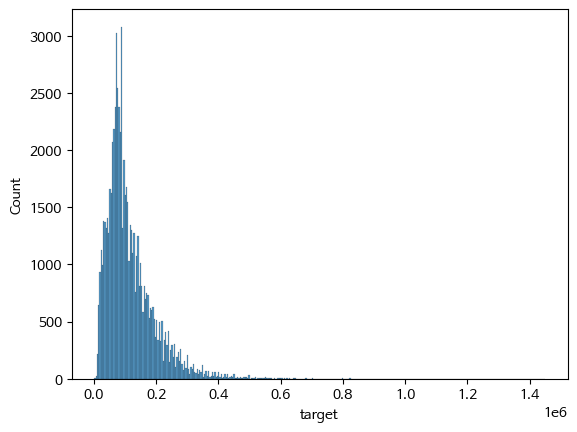

In [54]:
sns.histplot(dt[dt["구"] == "강남구"]['target'])

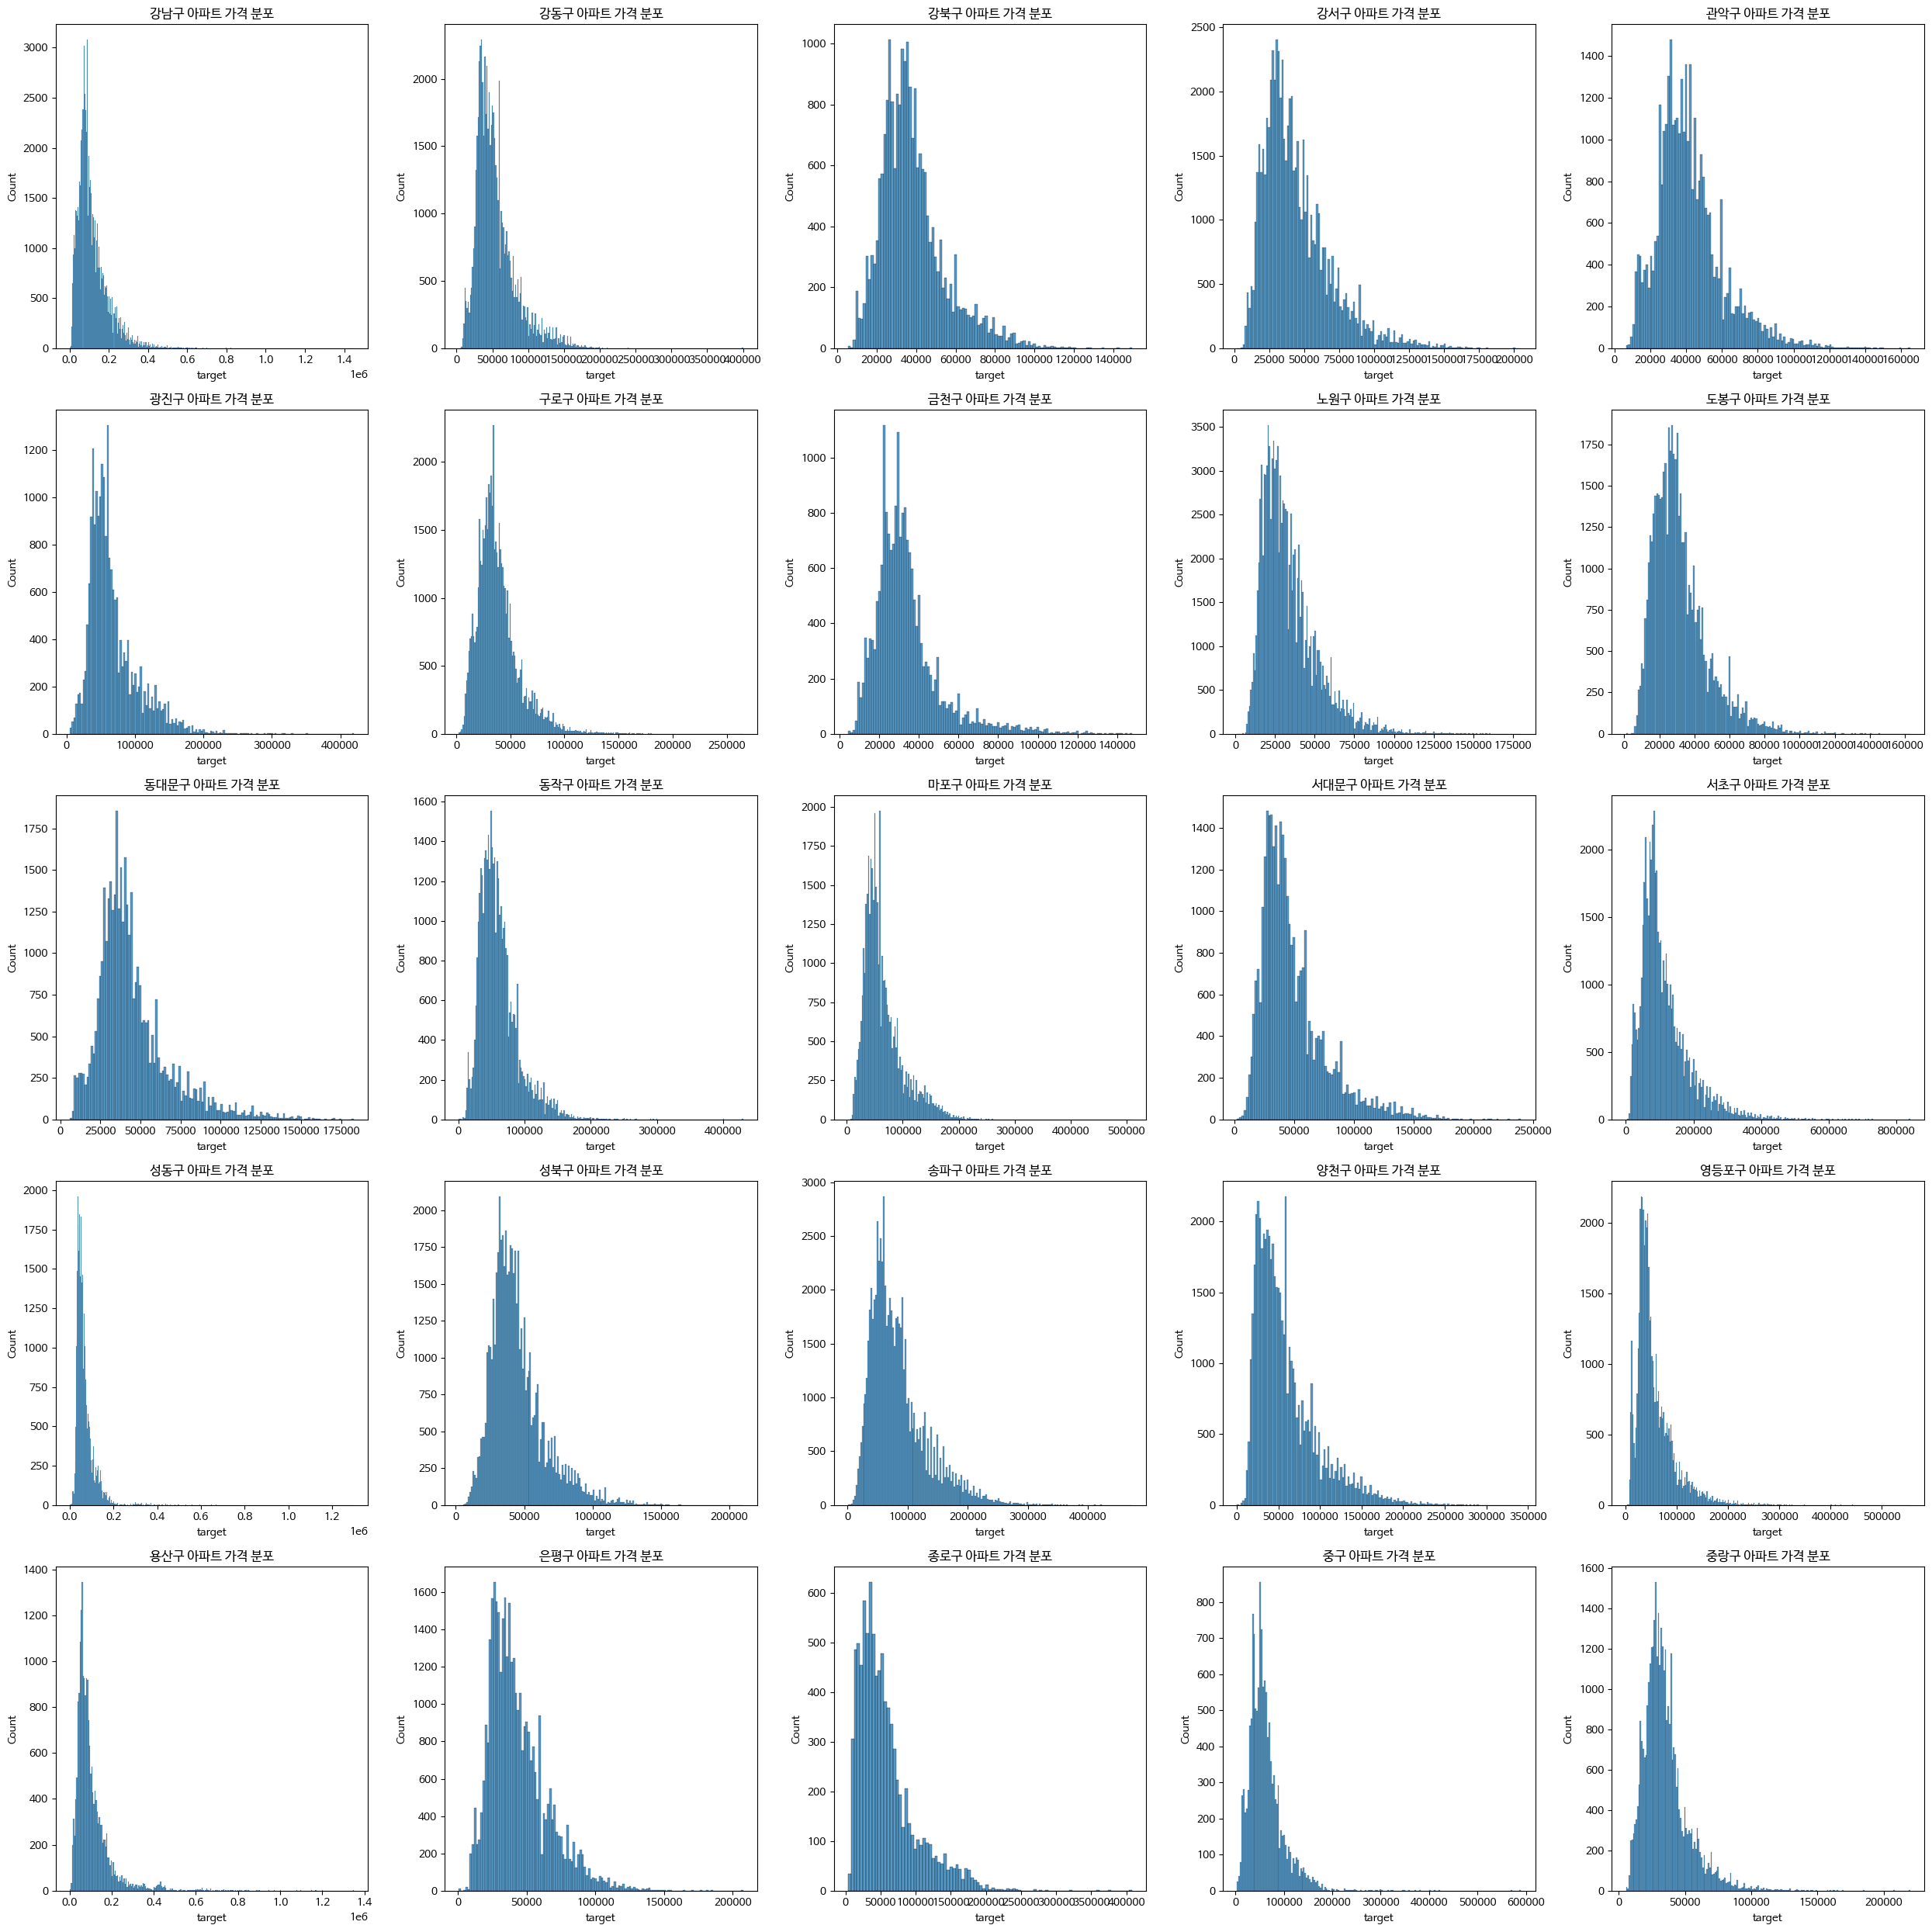

In [63]:
rows = 5
cols = 5

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (25,25))

for i, district in enumerate(list_of_gu):
    row = i // cols
    col = i % cols
    sns.histplot(dt[dt["구"] == district]['target'], ax=axs[row, col])
    axs[row, col].set_title(f"{district} 아파트 가격 분포")
    
plt.tight_layout()
plt.show()


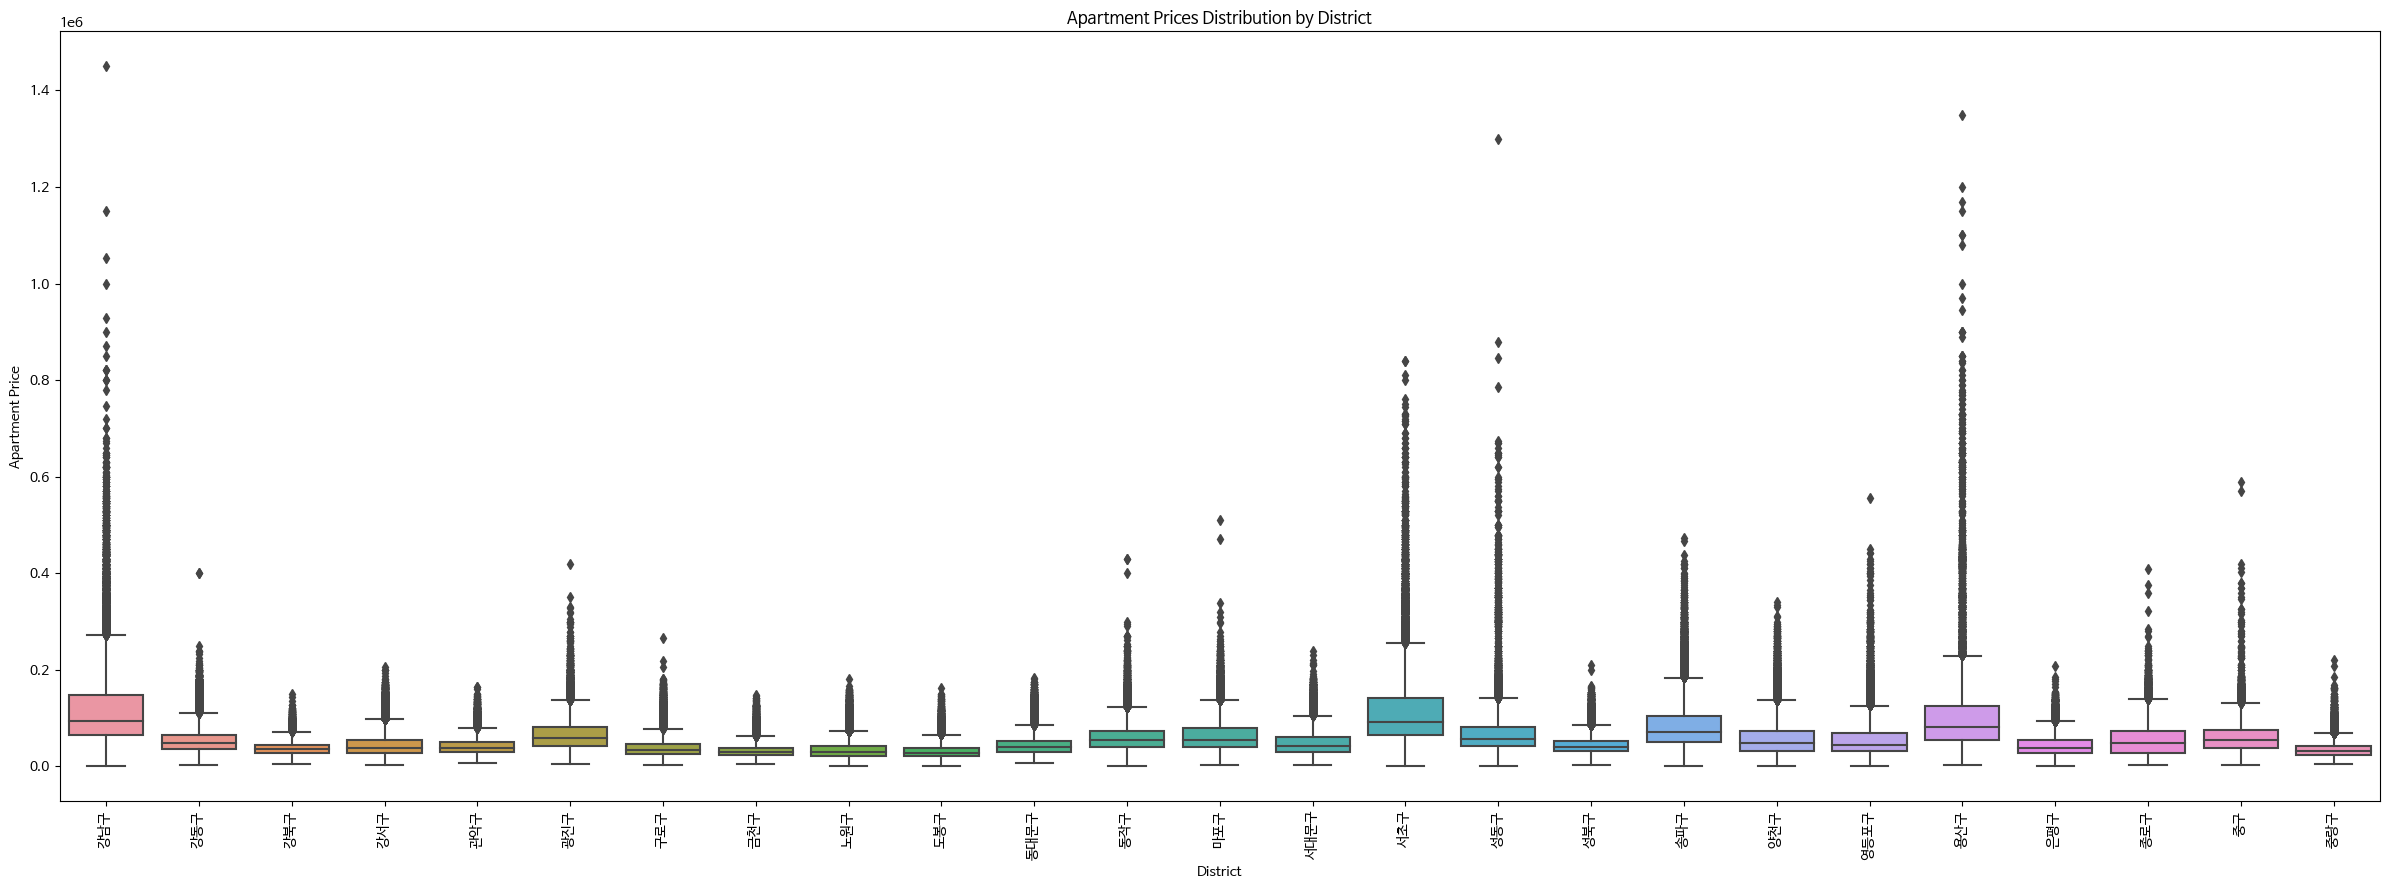

In [65]:
plt.figure(figsize=(24, 9))
sns.boxplot(data=dt, x="구", y="target")

plt.xticks(rotation=90)
plt.title('Apartment Prices Distribution by District')
plt.xlabel('District')
plt.ylabel('Apartment Price')

plt.tight_layout()
plt.show()

In [70]:
dt['계약년'] = dt['계약년월'].map(lambda x : x // 100)

In [71]:
dt[["계약년월", "계약년"]]

,계약년월,계약년
0,201712,2017
1,201712,2017
2,201712,2017
3,201801,2018
4,201801,2018
...,...,...
1118817,200707,2007
1118818,200708,2007
1118819,200708,2007
1118820,200709,2007


In [72]:
dt["계약년"].nunique()

17

In [73]:
dt["계약년"].max()

2023

In [74]:
dt["계약년"].min()

2007

In [76]:
pd.pivot_table(data=dt, values='target', aggfunc='mean', index='계약년', columns='구')

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
계약년,,,,,,,,,,,,,,,,,,,,,
2007,68492.480241,37643.641742,24511.337979,24843.482982,29540.273005,44644.557522,25067.260290,21788.908021,20288.673327,19953.110123,...,41356.413440,26862.870832,57157.136131,36611.724921,35160.455837,61461.442095,24566.385747,31667.410314,34468.266551,21566.125949
2008,75410.997303,39737.429907,31583.530494,29774.579287,34473.209644,49680.829204,30090.583282,27103.081818,29874.569010,28887.922975,...,44520.886988,33865.645415,60701.396208,40634.752388,41091.048580,71502.933526,33930.602283,37756.208426,42345.845850,28604.352304
2009,90125.680247,43891.700575,31225.276573,34749.665364,35945.203638,52620.463206,33472.650233,27178.081776,29838.755744,29548.755013,...,47377.980697,35198.756738,68303.203373,52512.865630,47517.516696,82825.496302,37260.934161,45389.786822,46538.949367,29391.256132
2010,86790.432695,43863.551897,30773.135314,34295.301878,34960.764271,58514.397115,31435.691892,27007.061093,28046.116370,27428.279553,...,46096.227904,34757.274802,69433.854662,52511.540385,48822.383655,80165.721180,41645.088757,44249.317365,50826.448889,29419.614274
2011,84603.758006,43264.023687,30603.733706,33859.352046,35499.815418,53639.918594,32050.686718,26394.790960,27570.123111,26836.137387,...,45474.237089,36689.328912,66317.744536,48360.546589,45449.346036,75028.889862,36798.476616,46569.466102,45999.868627,29974.029380
2012,82766.442580,43428.747994,29788.926708,31812.108925,32339.957715,54112.769811,30371.505217,25514.827586,25184.408615,25252.908546,...,48748.873429,34148.284834,64368.252496,46528.000956,39717.067187,70967.369885,34599.236823,51728.917275,54232.934599,28699.634146
2013,83862.295140,41675.895700,30546.154255,32603.746420,32854.694496,51648.298752,31124.363285,25144.621961,26406.593471,25922.967722,...,47250.668306,34369.079113,63636.414615,45039.732216,40488.816147,66337.723195,34136.950042,50662.591255,53736.959397,28744.105263
2014,88683.580956,42409.325290,31801.022164,34409.155390,34651.006579,54630.967796,32280.314688,26143.858051,27099.194733,26553.975000,...,50538.072168,36157.812421,63404.077181,46783.499590,42066.448880,77178.988197,34472.619100,45161.693431,50327.977949,30544.771184
2015,94137.125188,45859.403073,32514.594753,36235.247401,36533.005661,56347.511492,33609.899509,28518.626214,28695.292924,27716.943635,...,52798.334010,39231.094391,66873.515268,48074.194116,44378.783299,77455.773438,36246.200942,48980.566826,54604.913431,30085.675566


In [78]:
pt_mean_gu_yr = pd.pivot_table(data=dt, values='target', aggfunc='mean', index='계약년', columns='구')

In [80]:
dt[dt["계약년"] == 2007].groupby(["구"])["target"].mean().sort_values(ascending=False)

구
강남구     68492.480241
서초구     67612.265755
용산구     61461.442095
송파구     57157.136131
광진구     44644.557522
성동구     41356.413440
동작구     39935.153941
강동구     37643.641742
양천구     36611.724921
마포구     35812.156853
영등포구    35160.455837
중구      34468.266551
종로구     31667.410314
관악구     29540.273005
동대문구    27910.615006
서대문구    27696.284166
성북구     26862.870832
구로구     25067.260290
강서구     24843.482982
은평구     24566.385747
강북구     24511.337979
금천구     21788.908021
중랑구     21566.125949
노원구     20288.673327
도봉구     19953.110123
Name: target, dtype: float64

Text(0.5, 1.0, '2007년 구별 평균가')

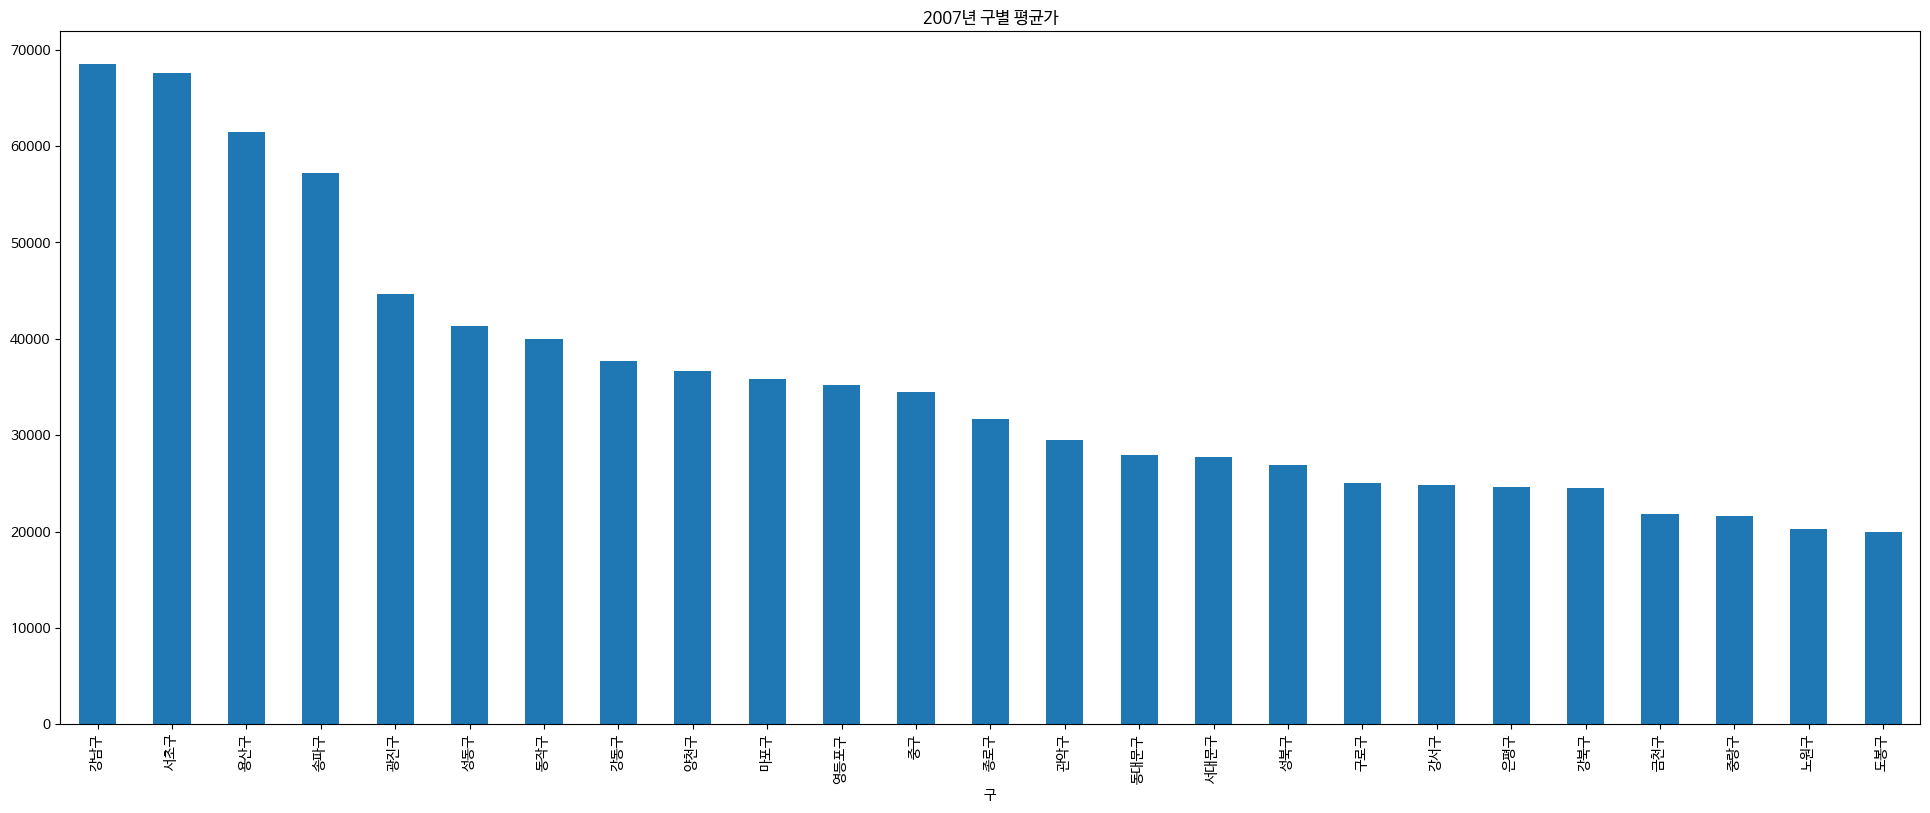

In [81]:
plt.figure(figsize=(24, 9))
dt[dt["계약년"] == 2007].groupby(["구"])["target"].mean().sort_values(ascending=False).plot.bar()
plt.title("2007년 구별 평균가")

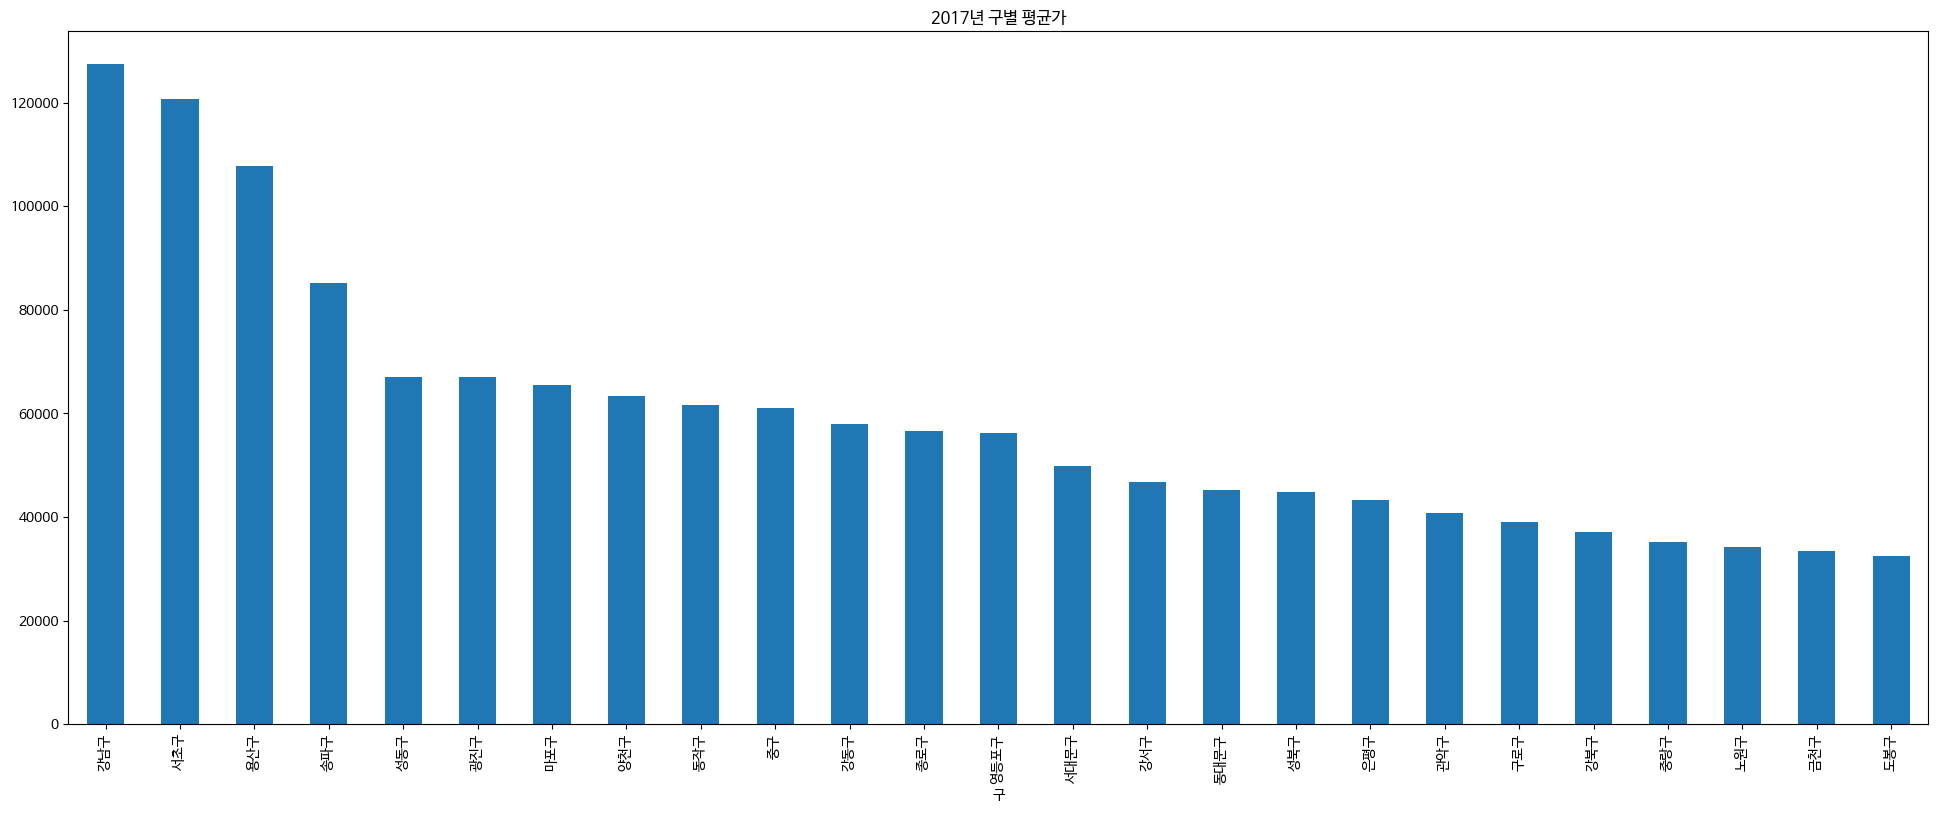

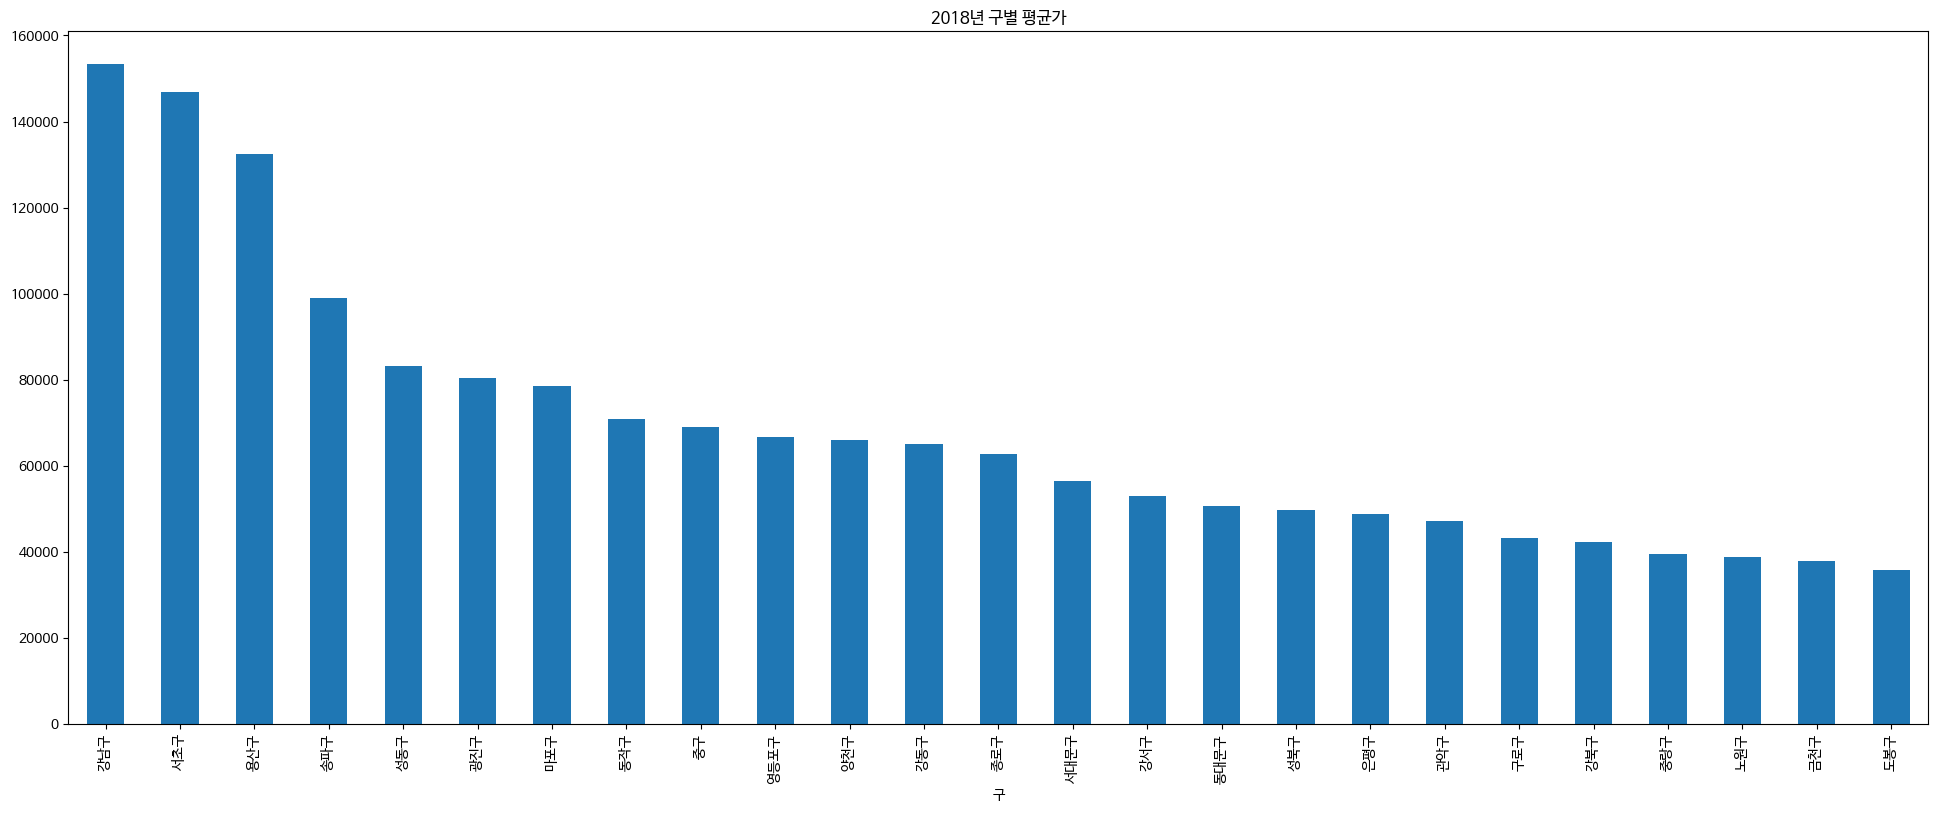

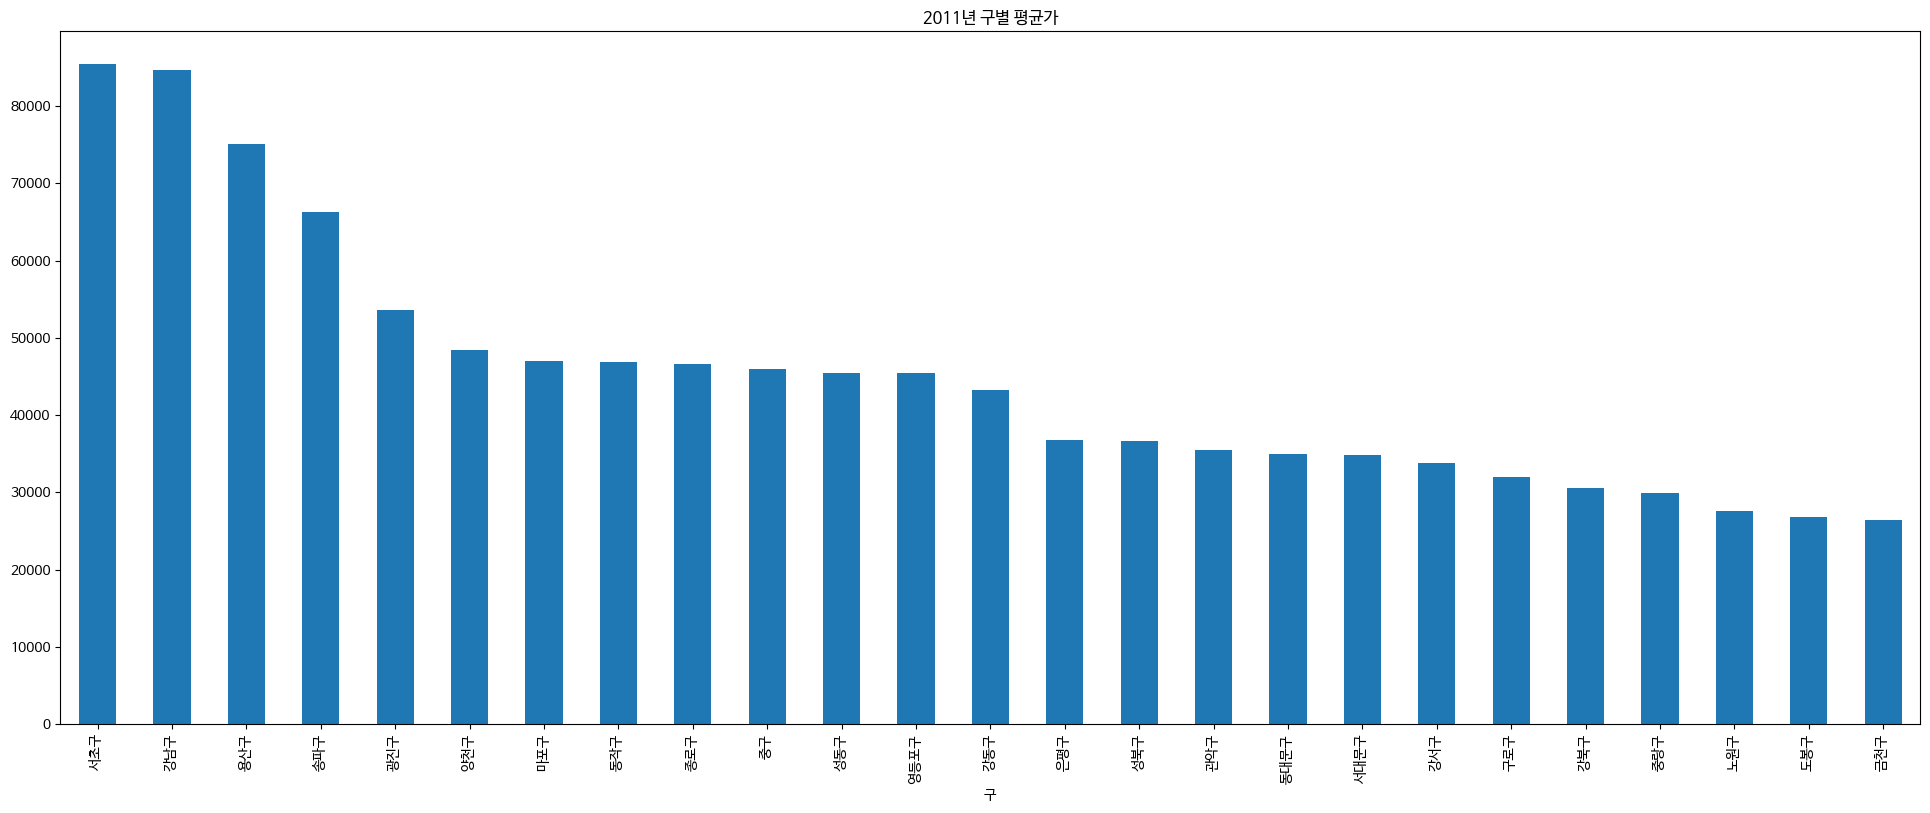

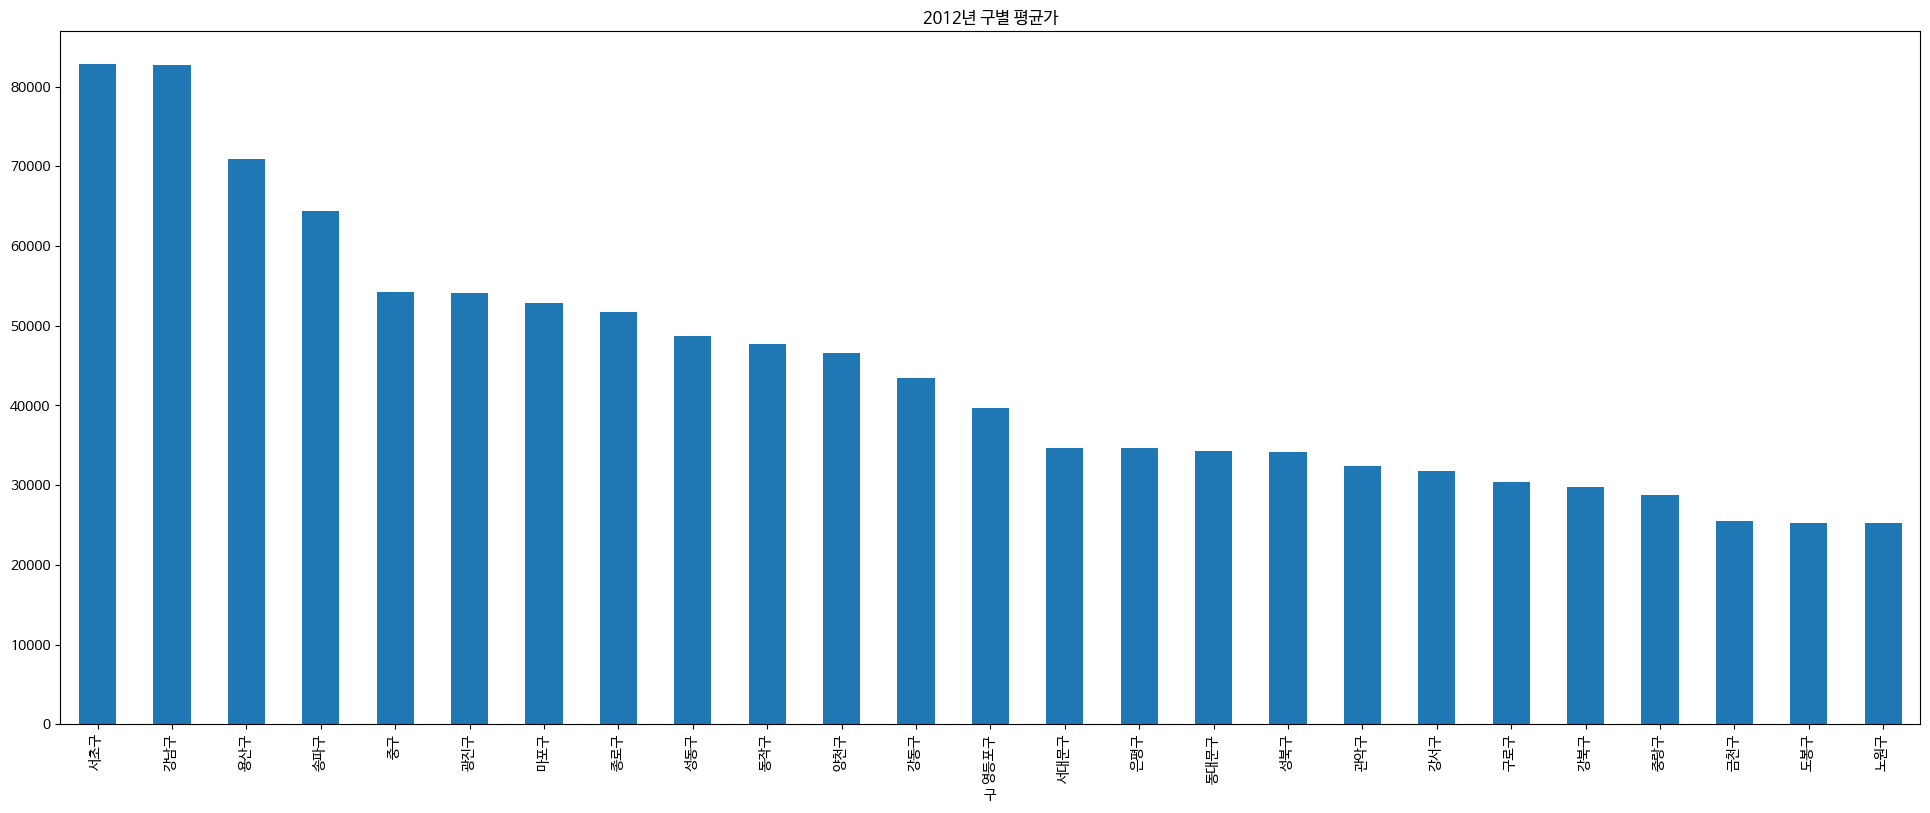

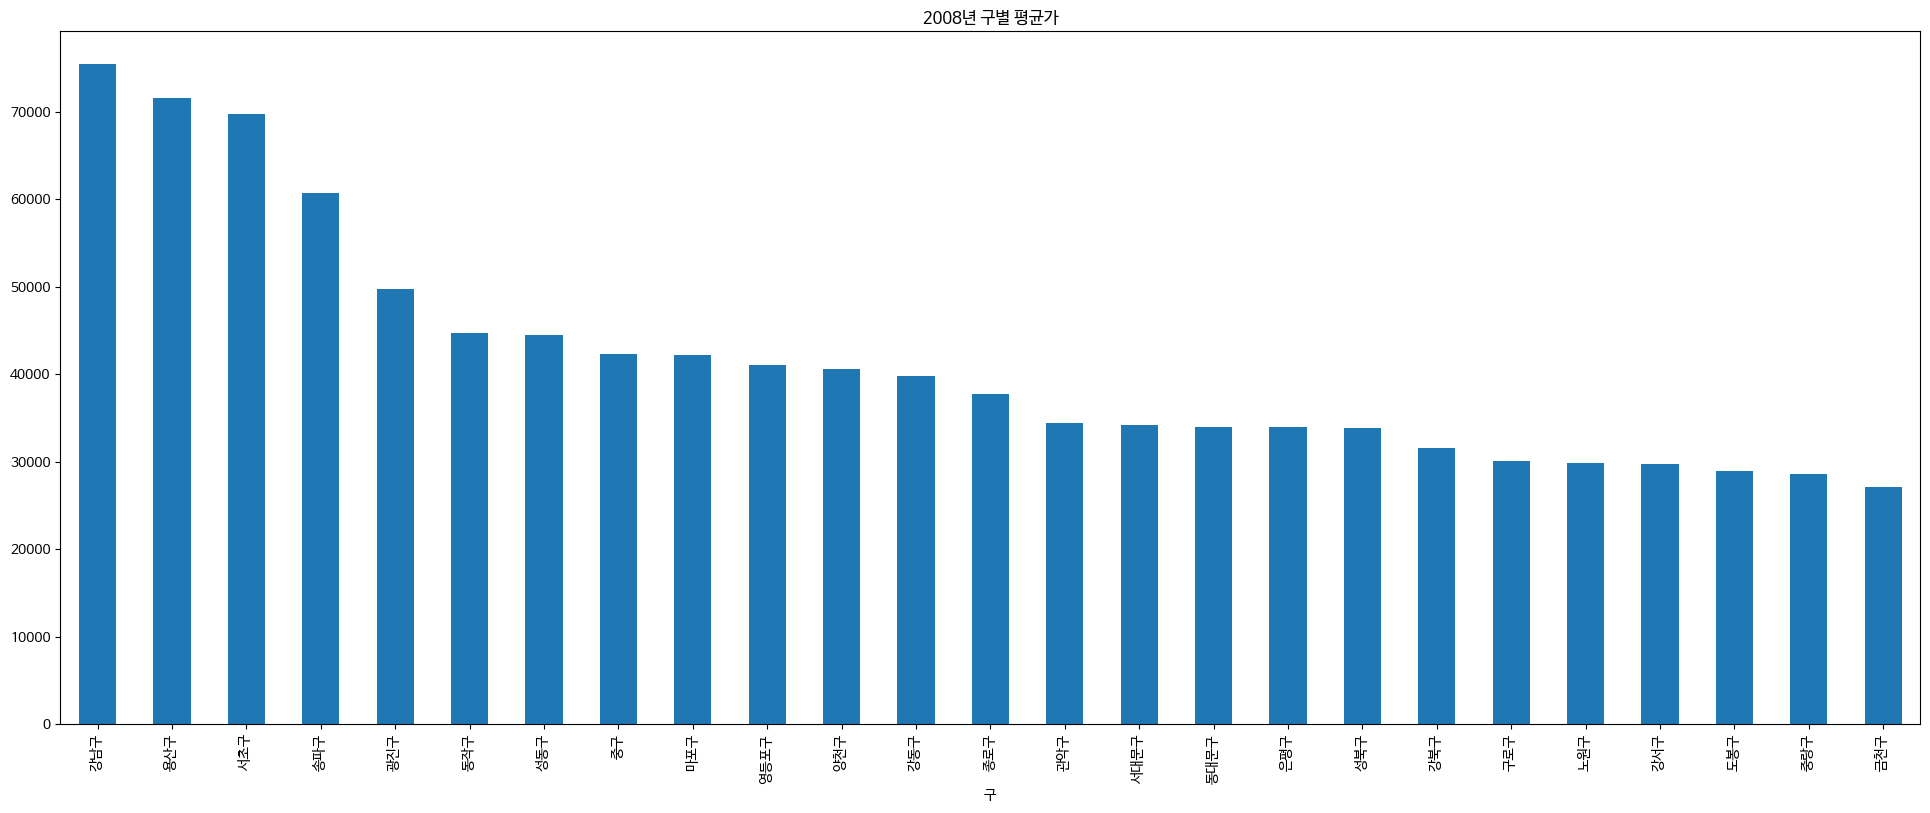

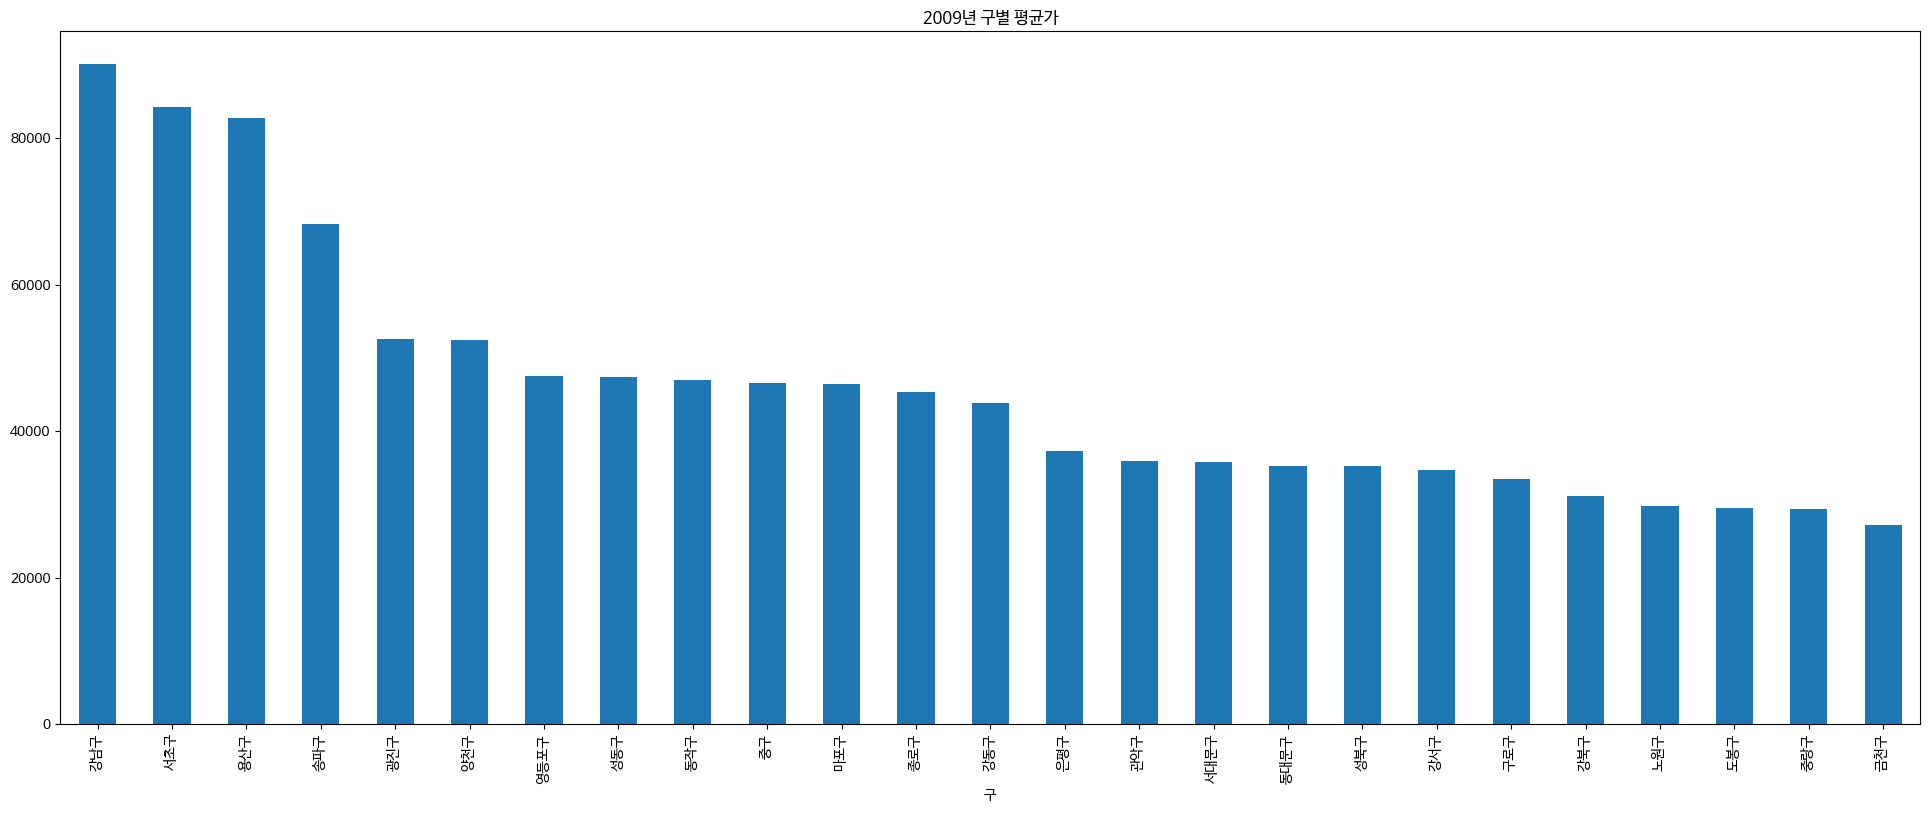

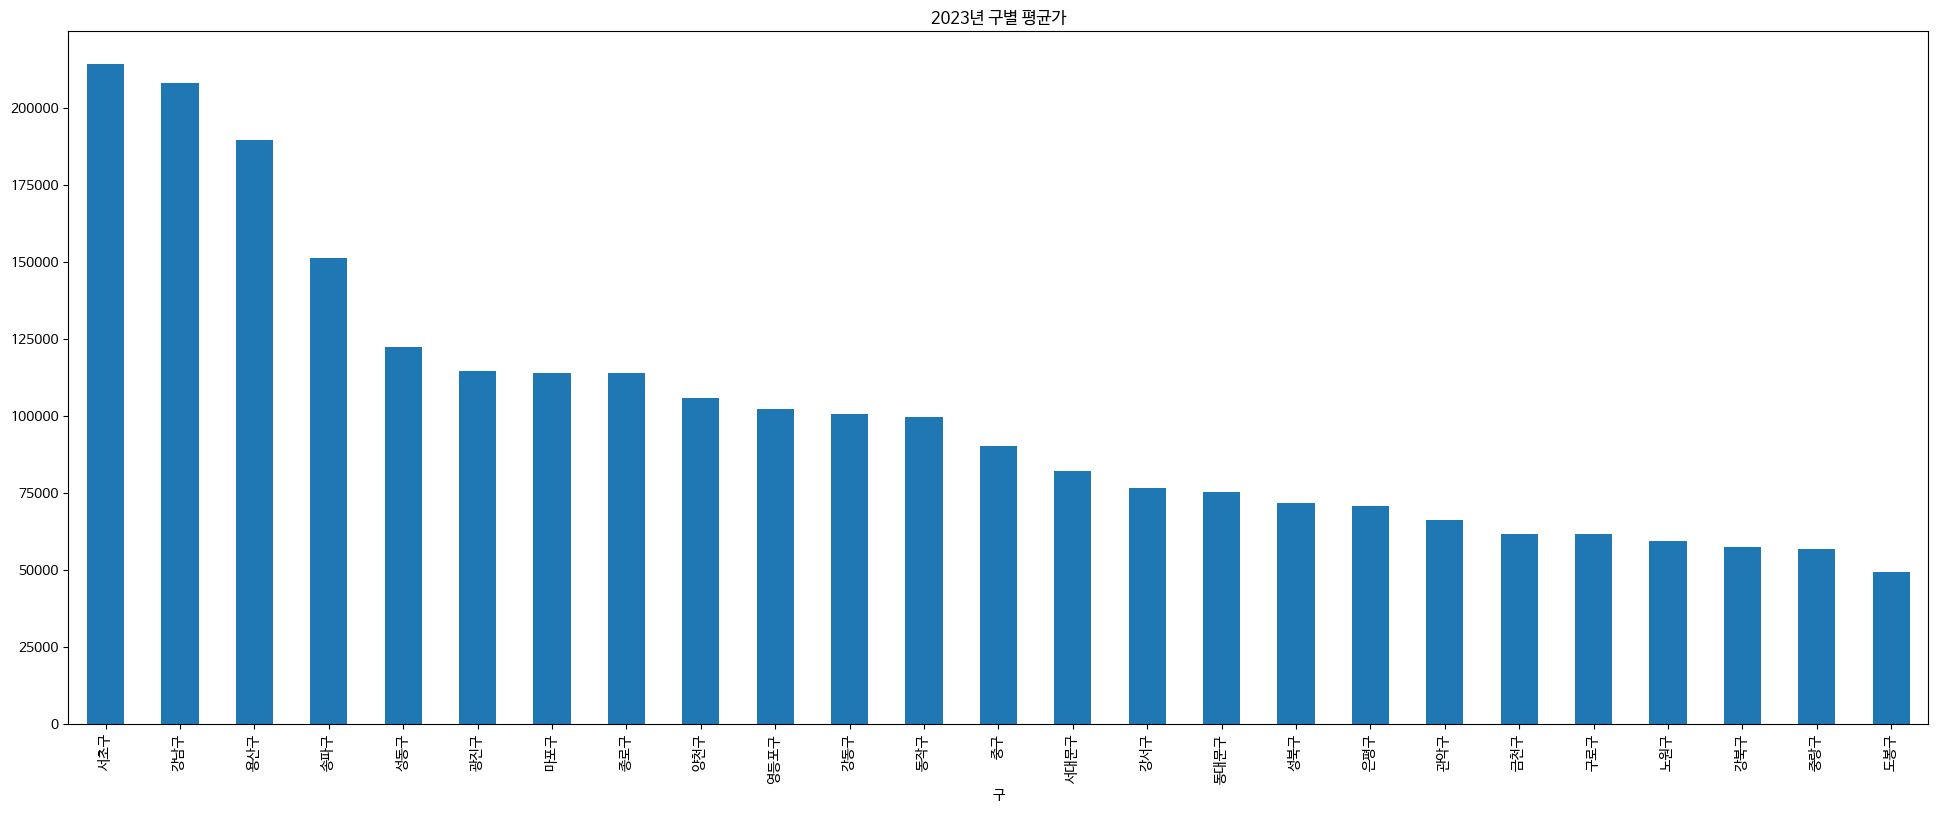

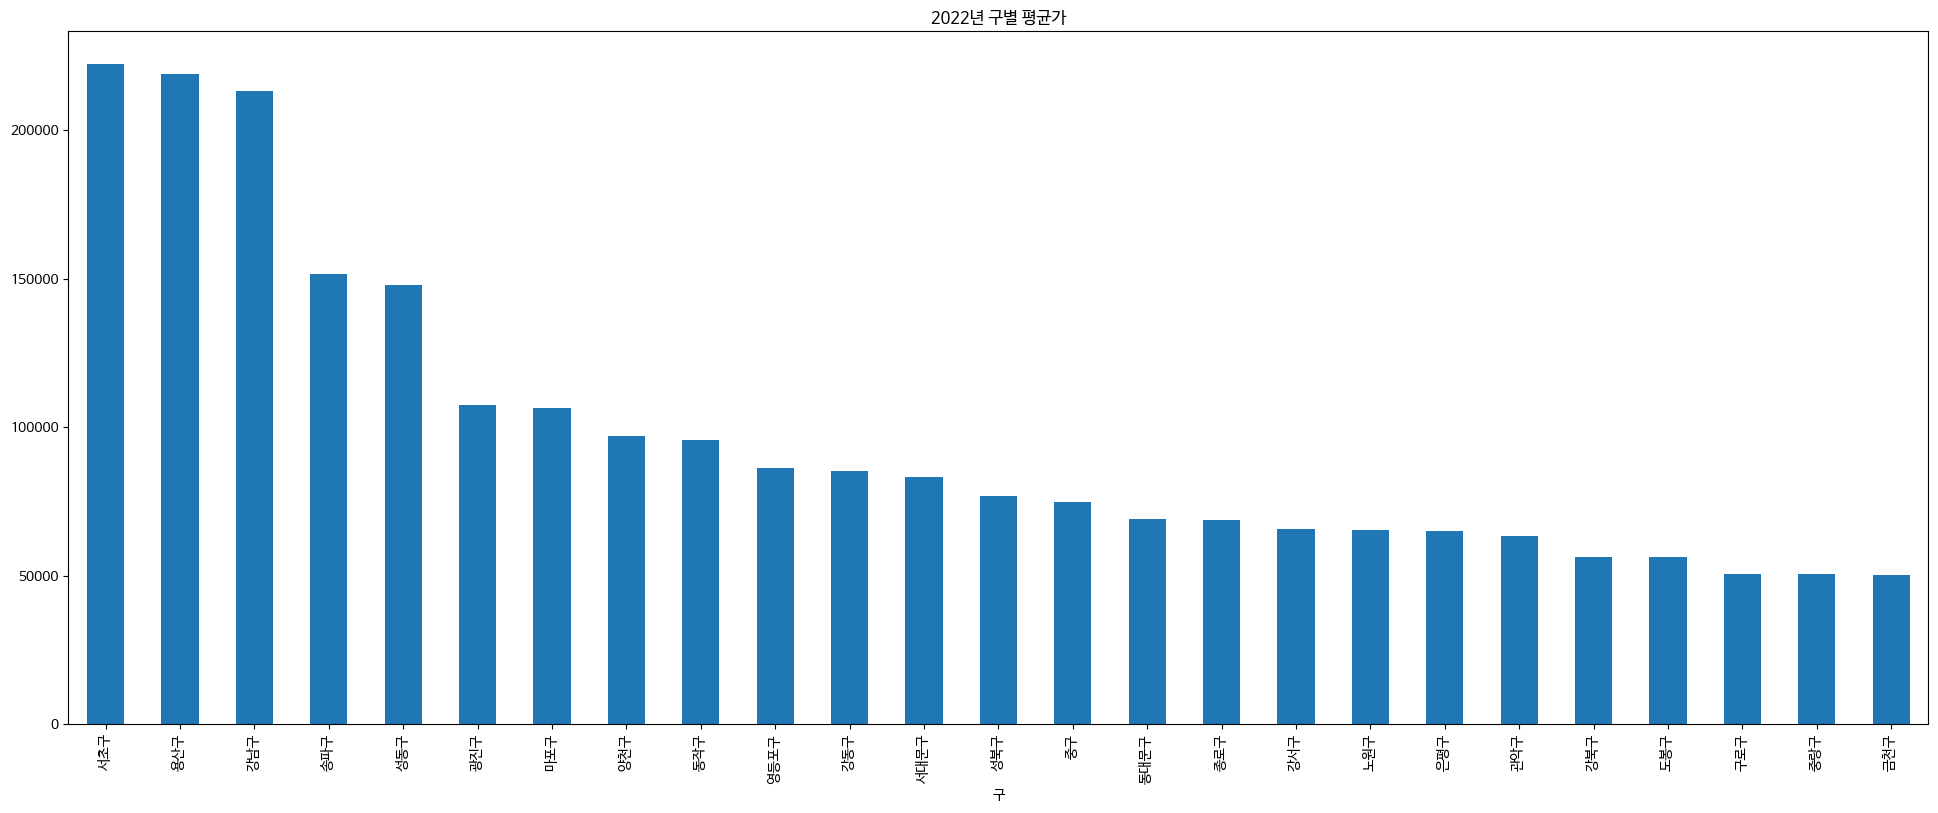

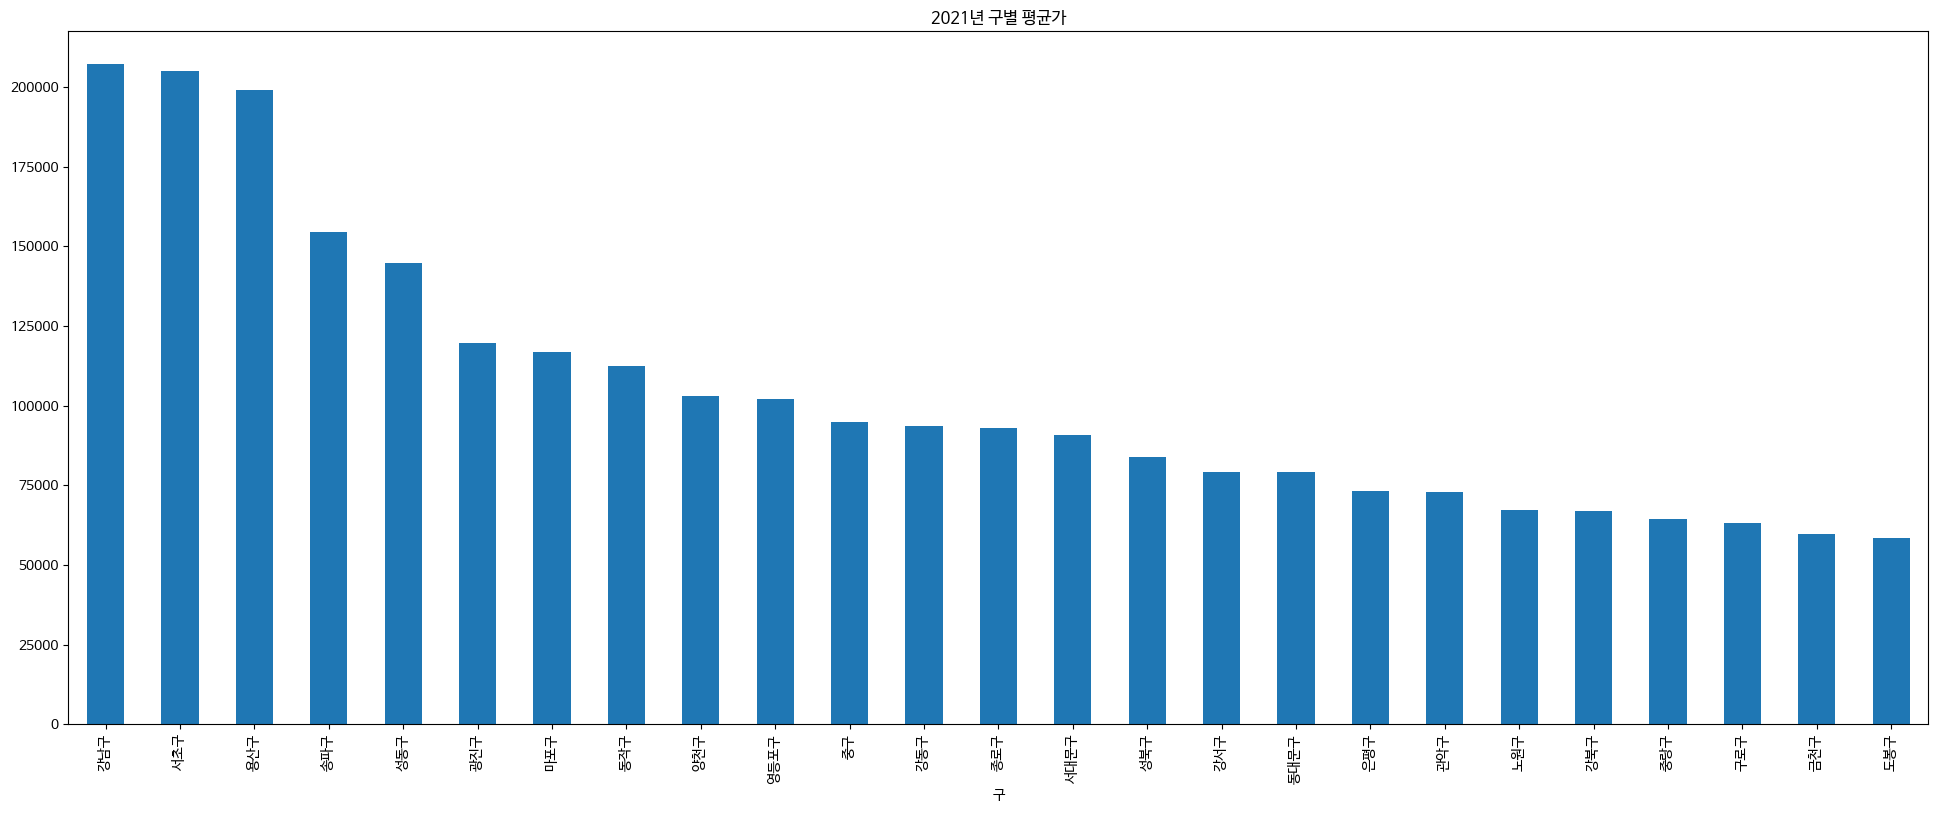

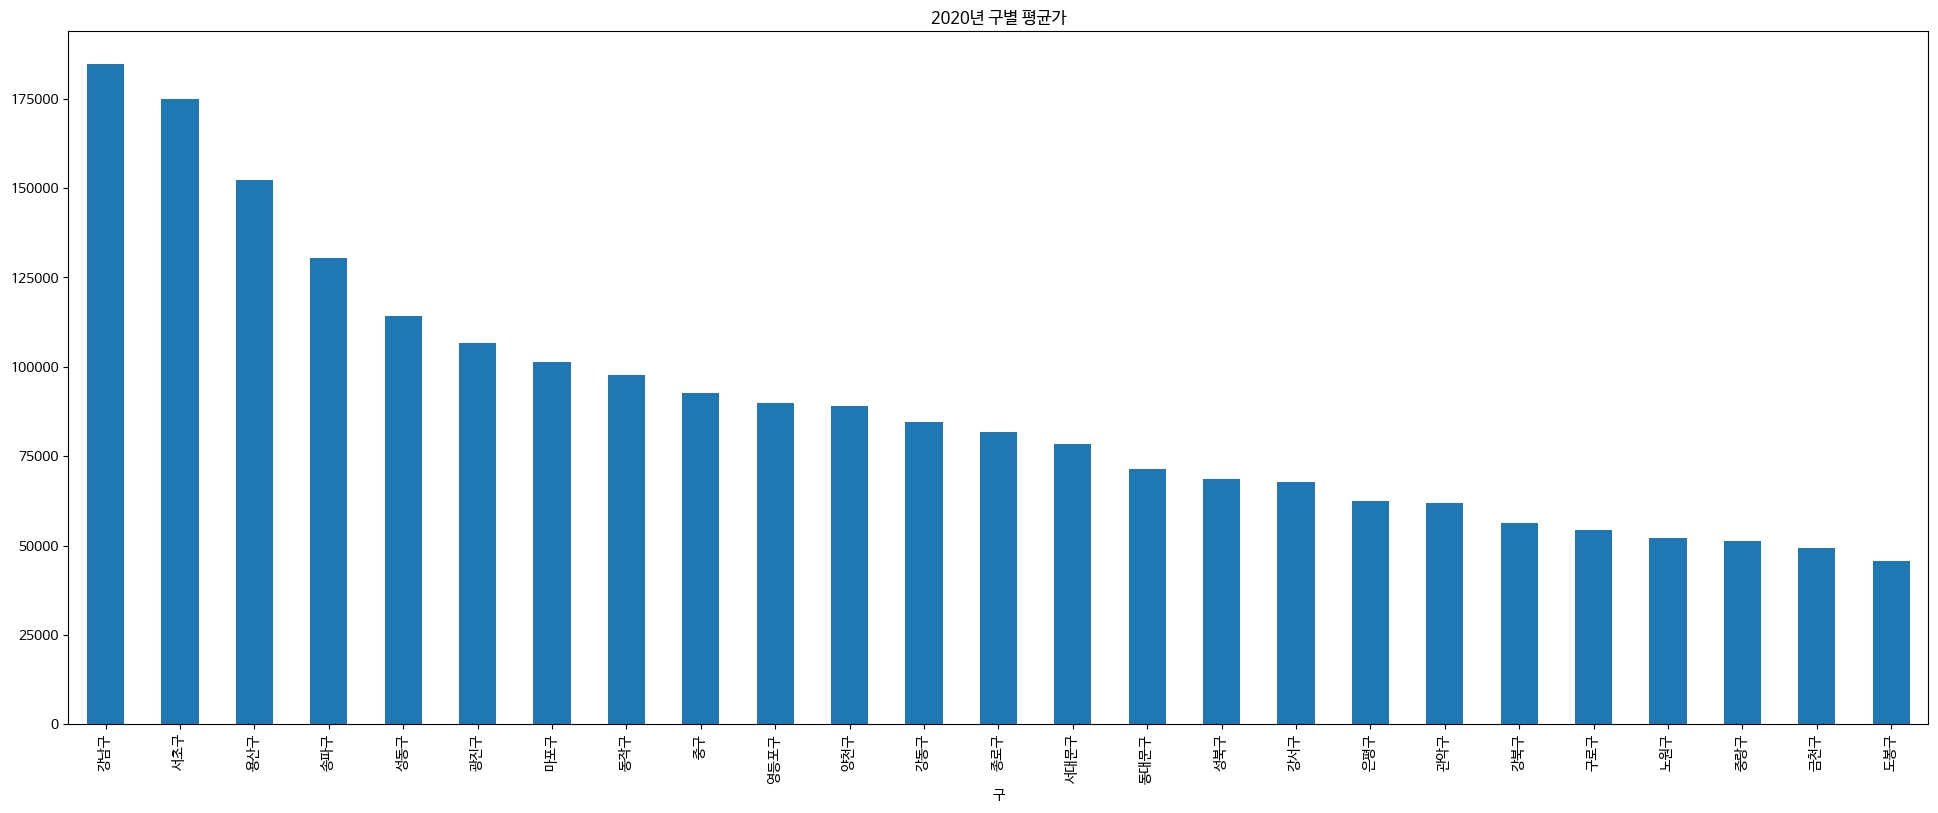

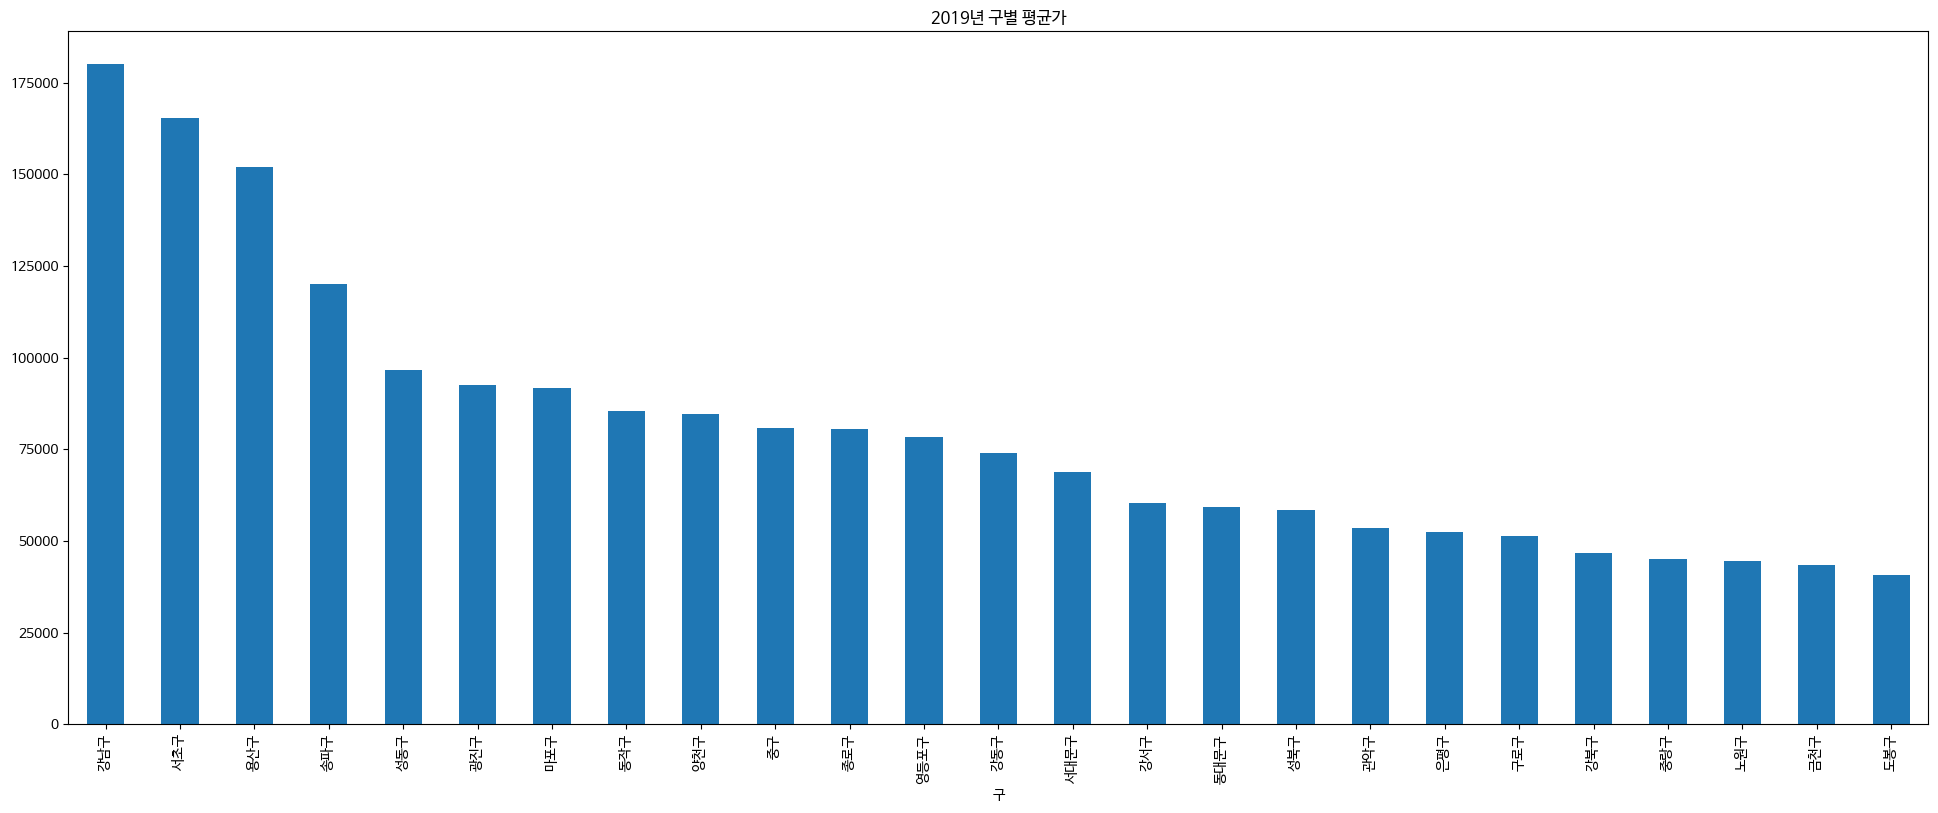

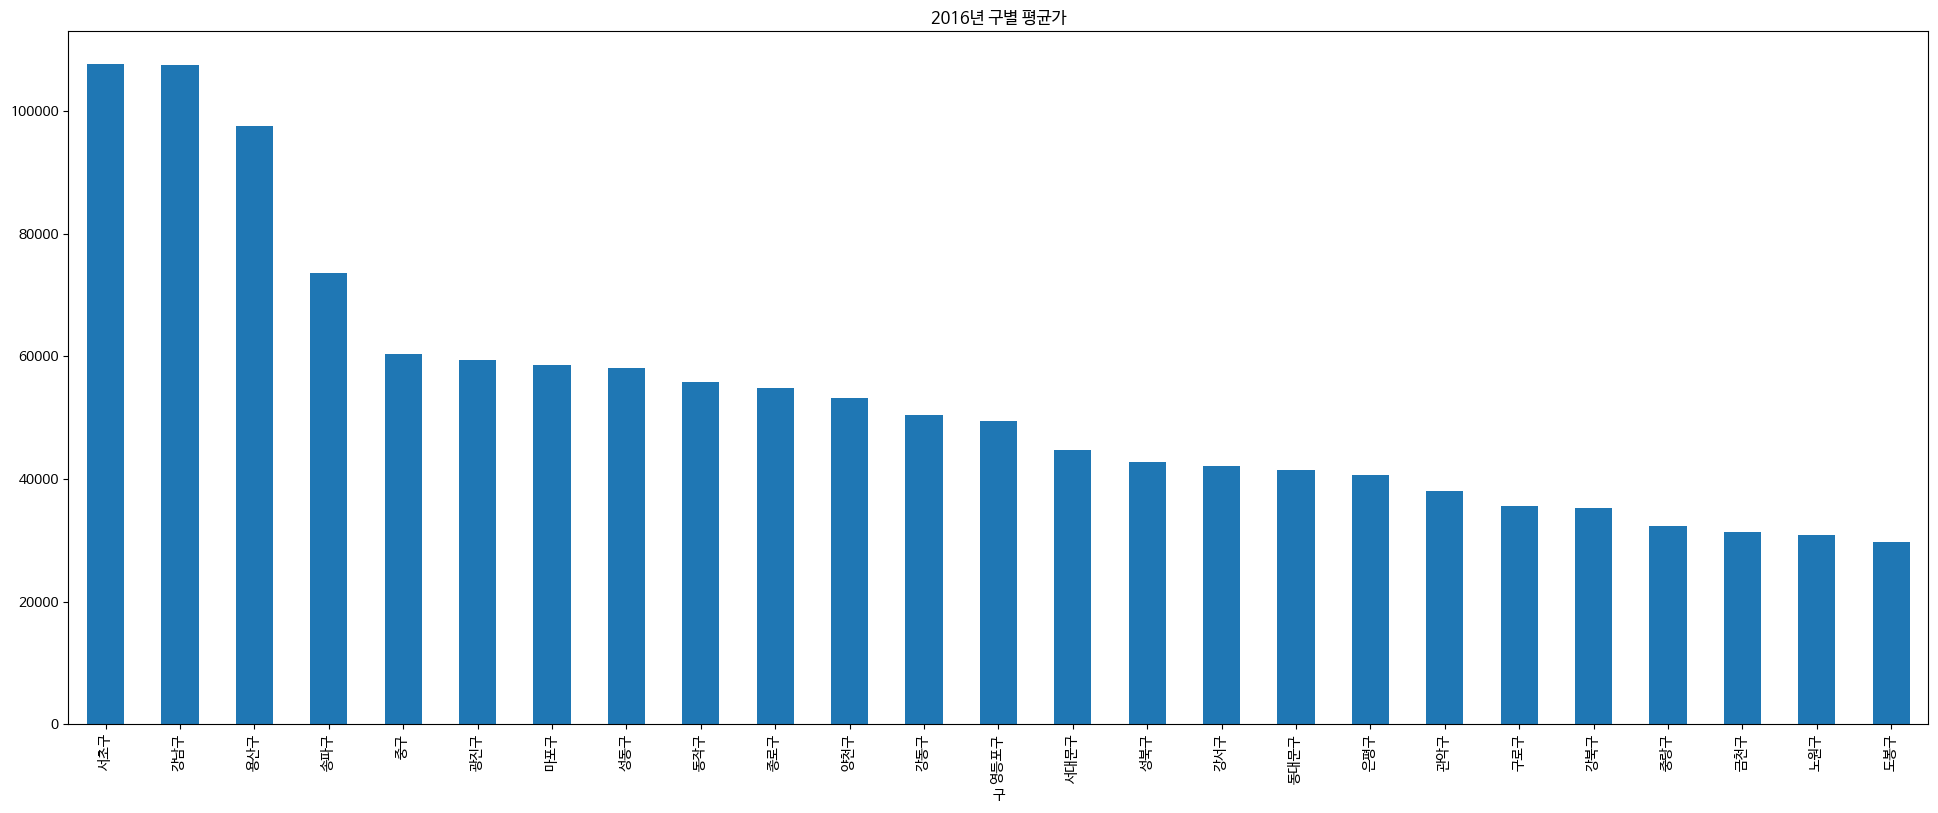

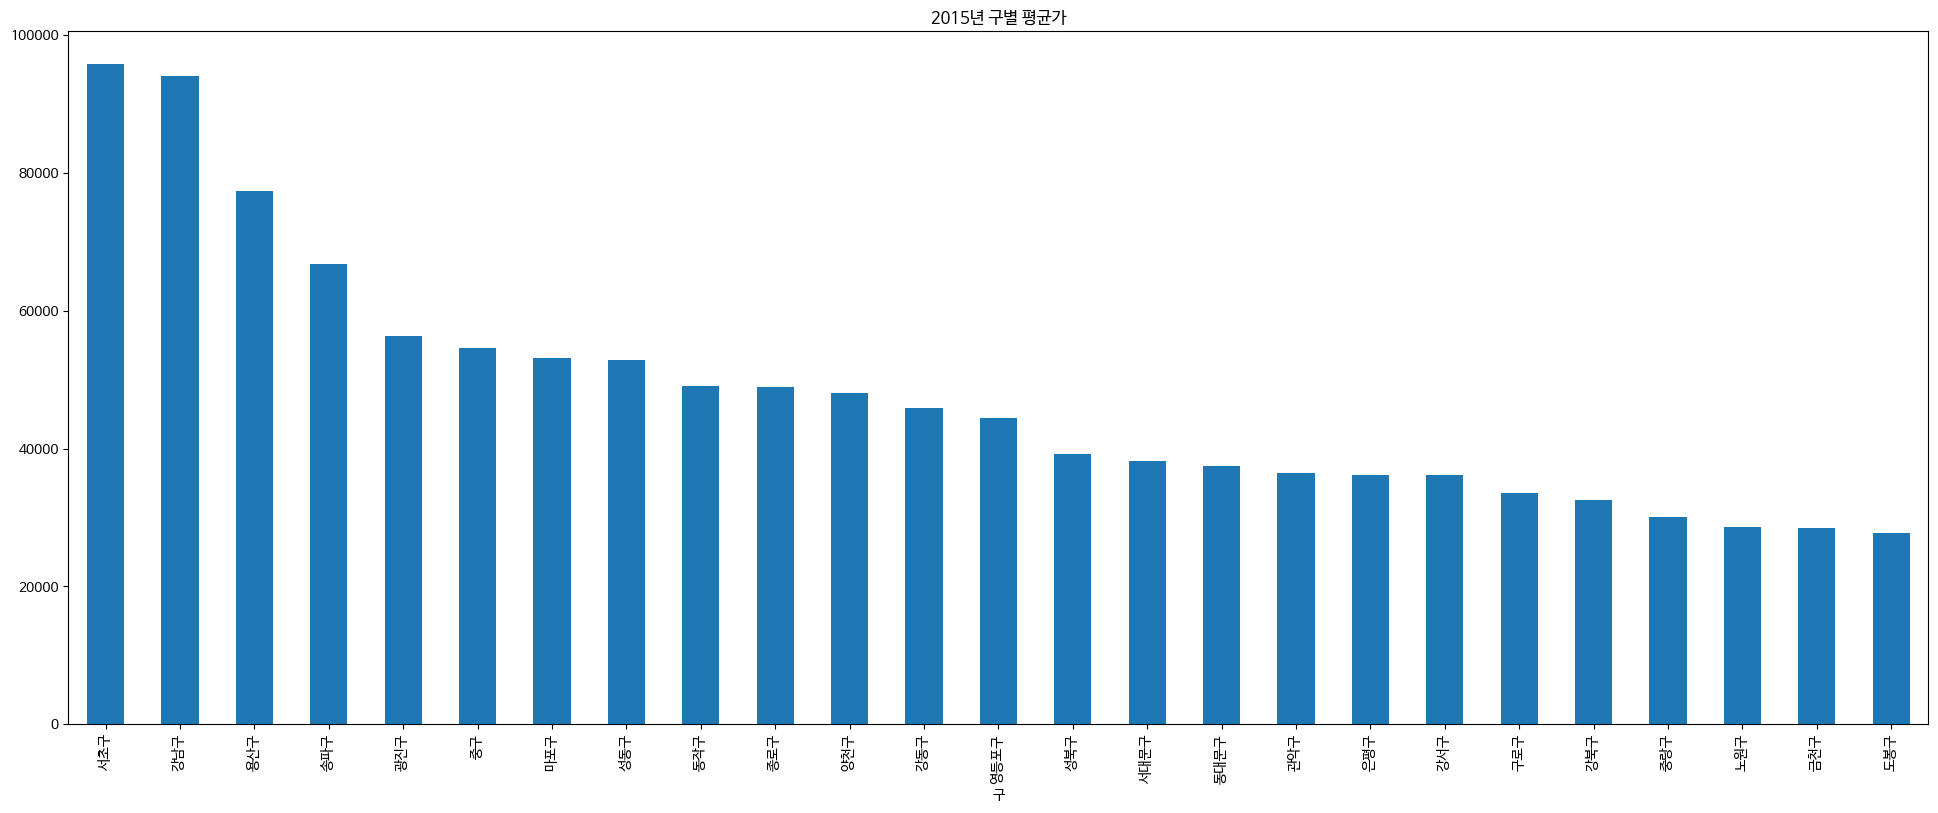

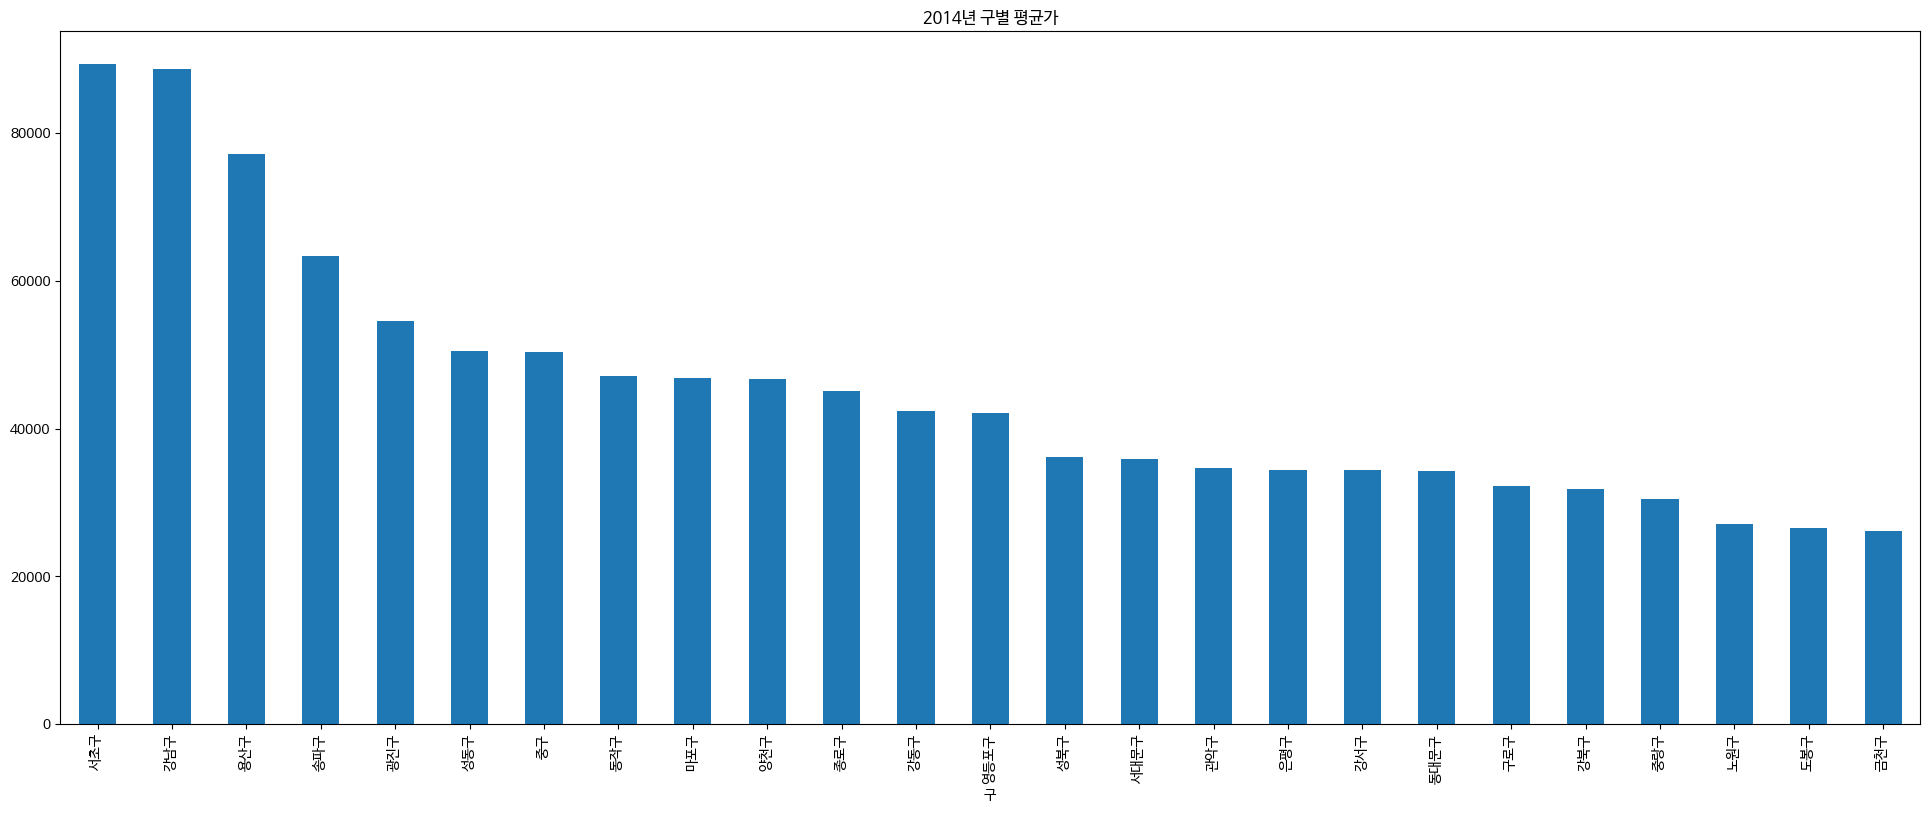

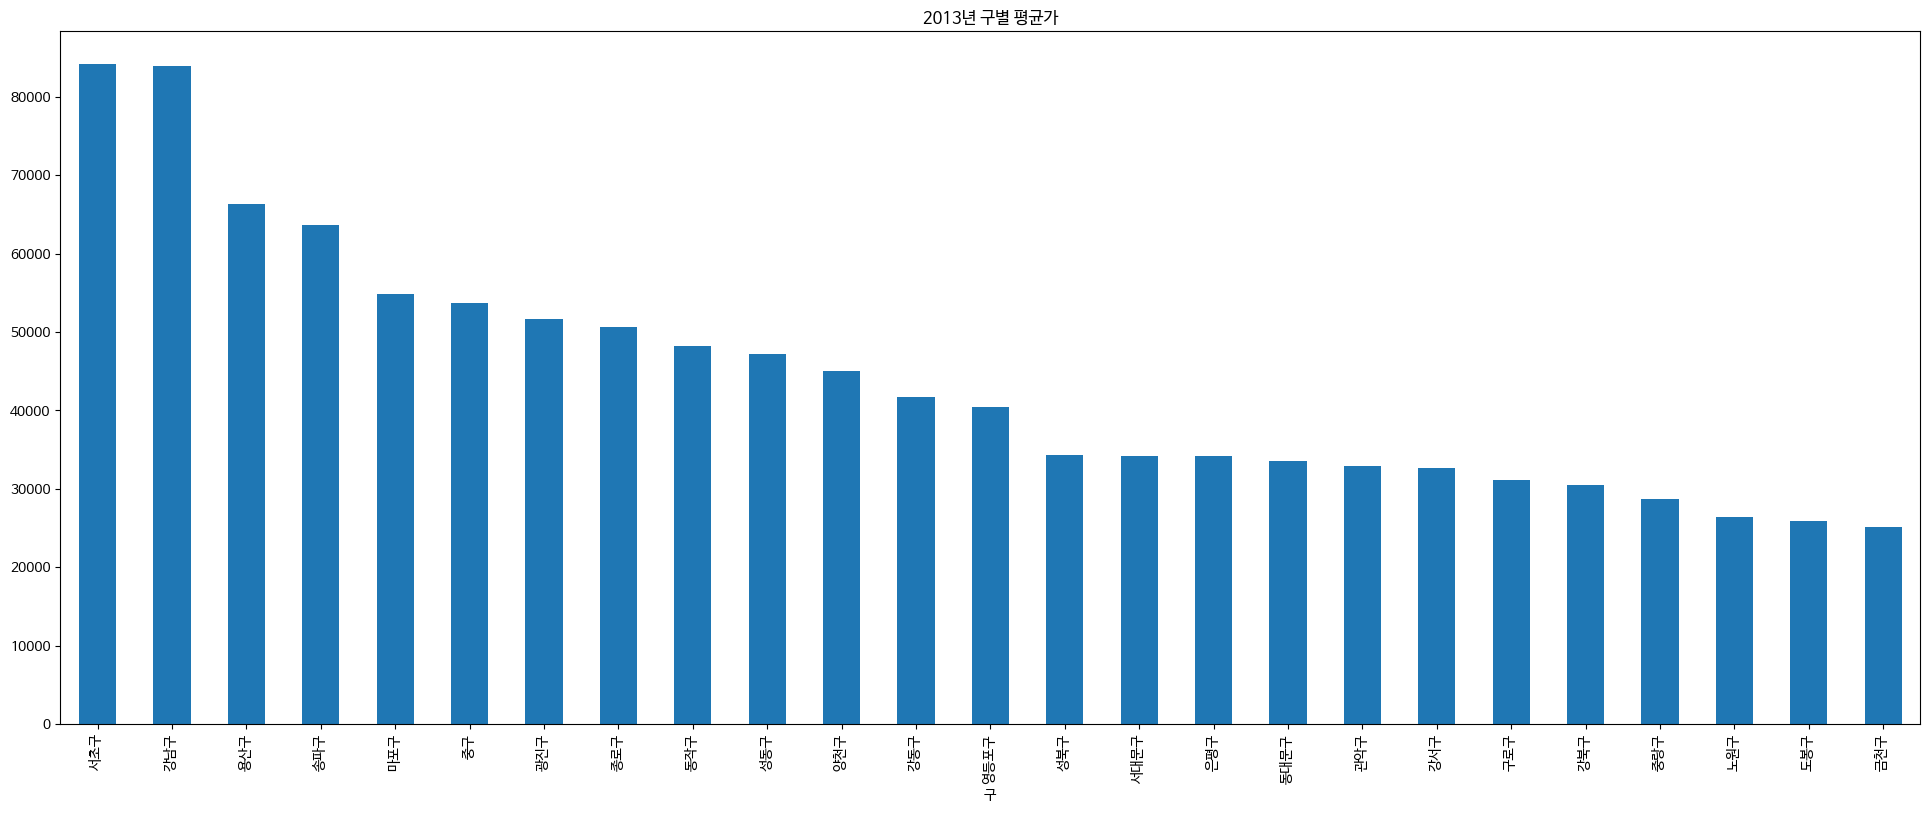

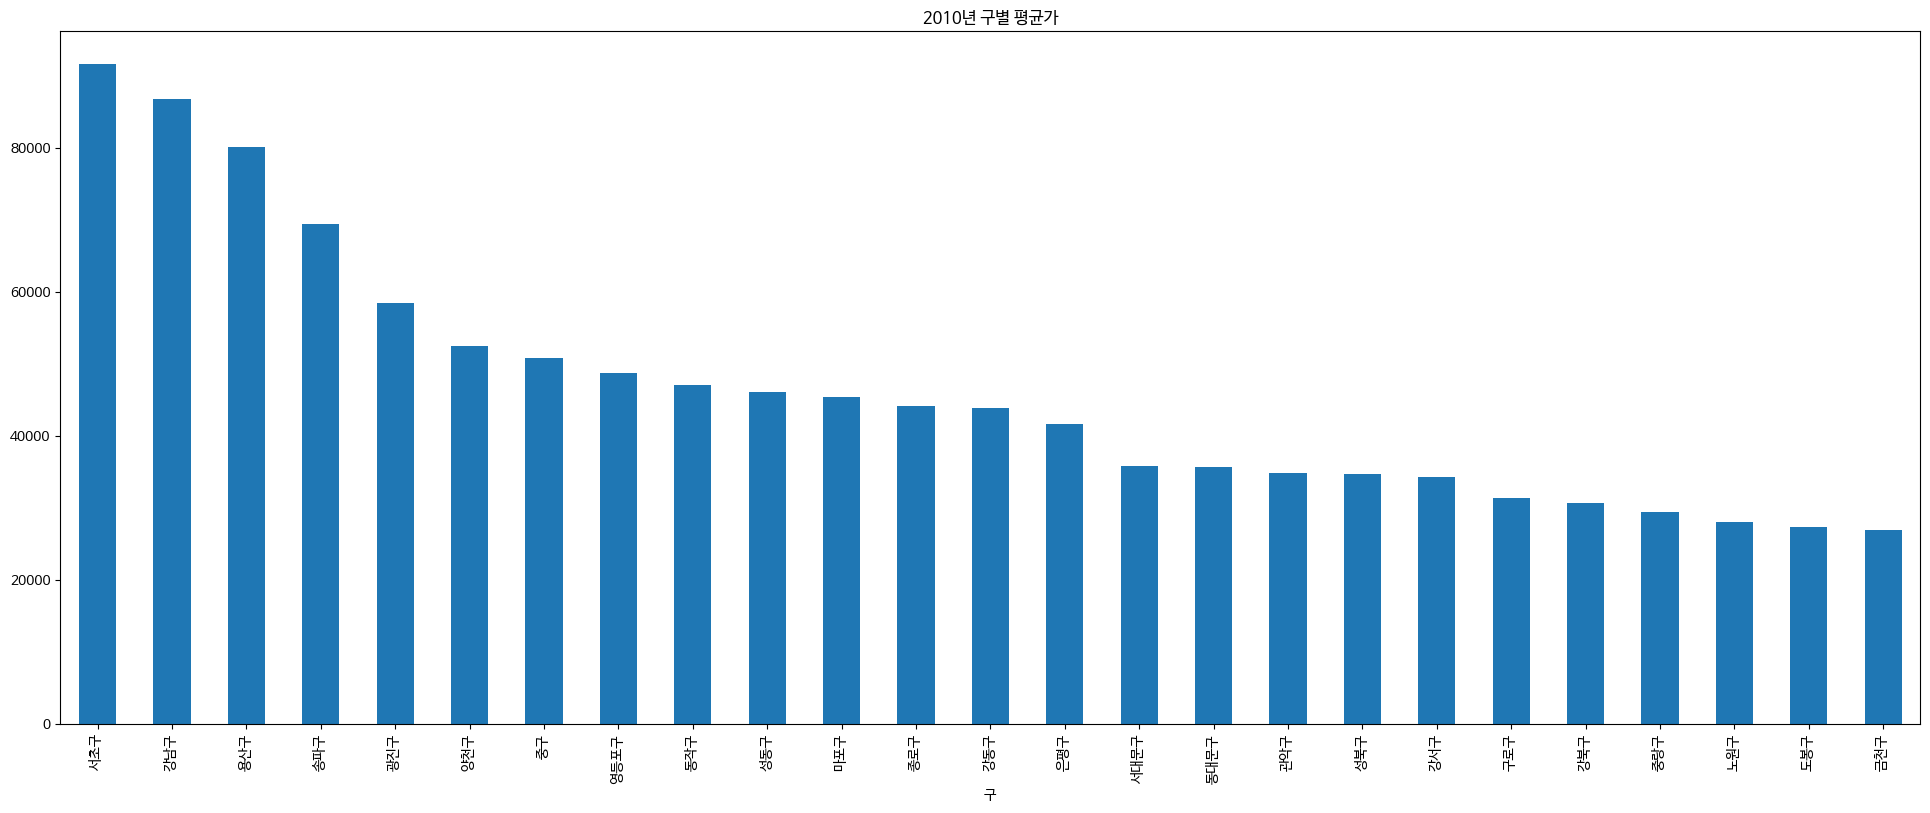

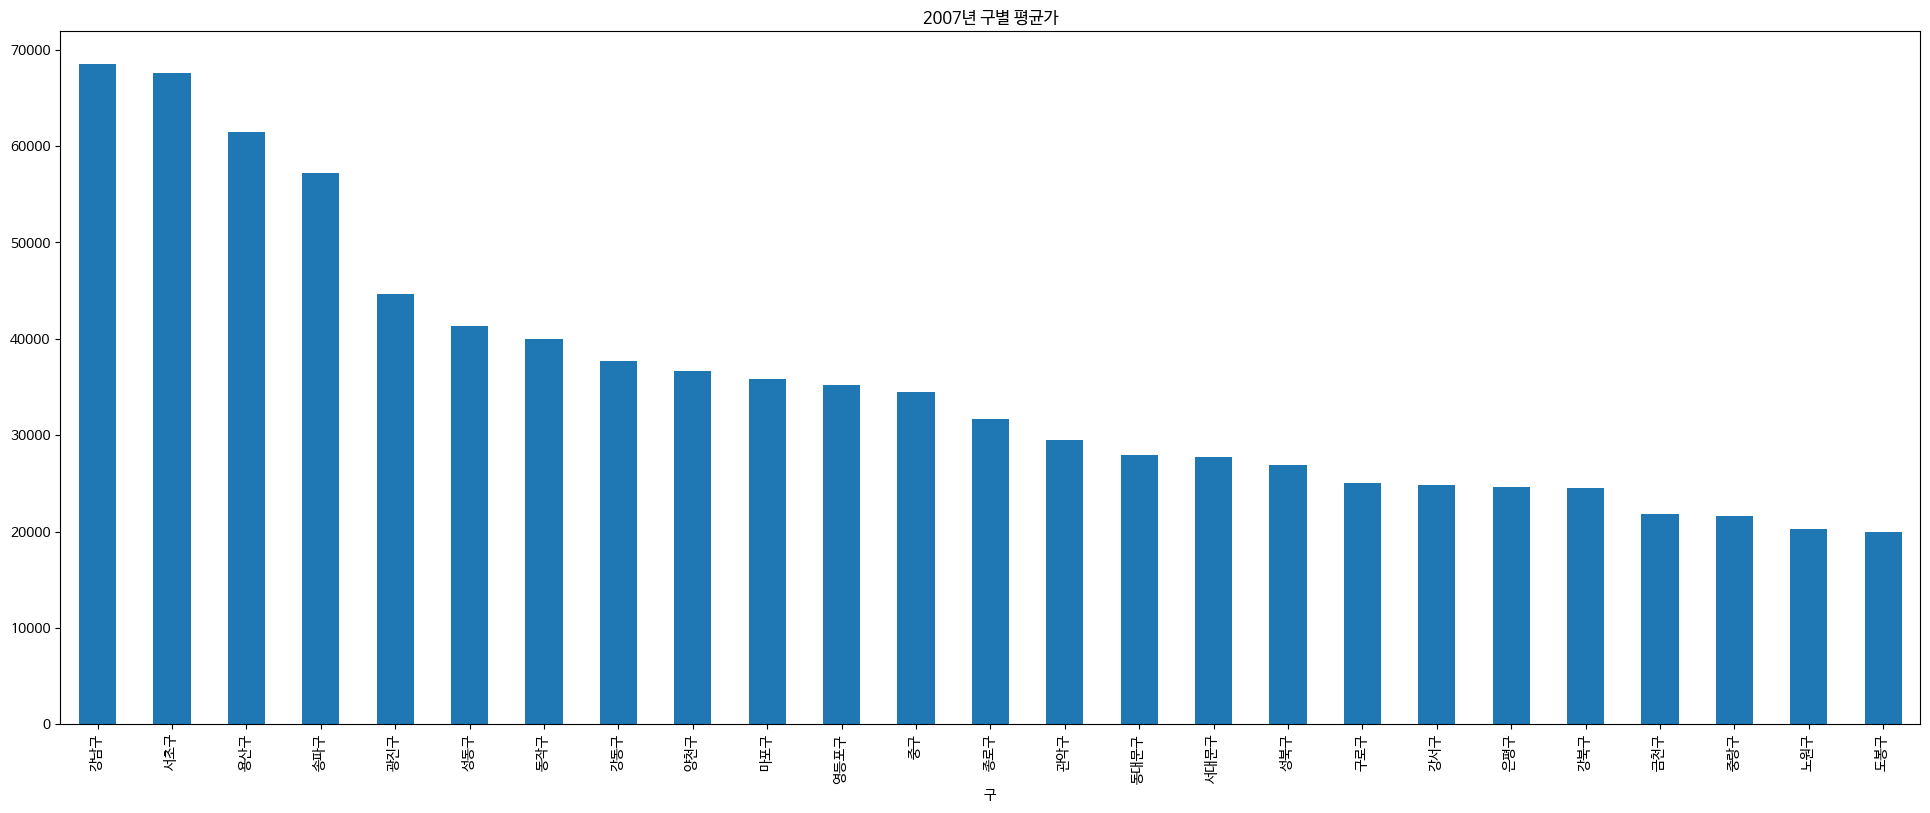

In [82]:
for yr in dt["계약년"].unique().tolist():
    plt.figure(figsize=(24, 9))
    dt[dt["계약년"] == yr].groupby(["구"])["target"].mean().sort_values(ascending=False).plot.bar()
    plt.title(f"{yr}년 구별 평균가")

## 3. Data Preprocessing

- 모델링 전에 데이터 내 결측치, 이상치 등을 제거하고 범주형과 연속형 변수를 살펴보도록 하겠습니다!
- 먼저, 용이한 전처리를 위해 train과 test data를 합친 하나의 데이터로 진행하도록 하겠습니다.

In [8]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # 하나의 데이터로 만들어줍니다.

In [9]:
concat['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

0    1118822
1       9272
Name: is_test, dtype: int64

### 3.1. 결측치 탐색 및 보간
- 결측치를 처리할 때 많이 쓰는 방법은 삭제(Deletion)과 대체(Imputation) 입니다.
- 본 Baseline에서는 결측치가 90% 이상을 차지하는 변수의 결측치는 제거하고, 나머지 결측치는 대체하도록 하겠습니다.
  - 연속형 변수의 경우에는 선형보간(Linear interpolation)으로 대체하겠습니다.
  - 범주형 변수의 경우에는 'NULL' 이라는 임의의 범주로 대체해주도록 하겠습니다.

- 참고 ✅
  - 선형보간(Linear interpolation)이란 두 점의 값이 주어졌을 때 **그 사이의 값**을 추정하기 위해 직선 거리에 따라 선형적으로 계산하는 방법입니다.
  - 아래 두개의 붉은 점 사이에 ($x$, $y$) 값을 추정하기 위해, 해당 점이 두 붉은 점을 이은 선형적인 선분에 있다고 가정하고, 단순 비례식으로 ($x$, $y$)를 추정해 보간하는 방법입니다.
  - [참고자료](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


In [10]:
# 위 처럼 아무 의미도 갖지 않는 칼럼은 결측치와 같은 역할을 하므로, np.nan으로 채워 결측치로 인식되도록 합니다.
concat['등기신청일자'] = concat['등기신청일자'].replace(' ', np.nan)
concat['거래유형'] = concat['거래유형'].replace('-', np.nan)
concat['중개사소재지'] = concat['중개사소재지'].replace('-', np.nan)

In [11]:
# EDA에 앞서 결측치를 확인해보겠습니다.
concat.isnull().sum()

시군구                             0
번지                            227
본번                             75
부번                             75
아파트명                         2136
전용면적(㎡)                         0
계약년월                            0
계약일                             0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1121899
등기신청일자                    1111271
거래유형                      1086451
중개사소재지                    1090013
k-단지분류(아파트,주상복합등등)         877273
k-전화번호                     876850
k-팩스번호                     879348
단지소개기존clob                1058958
k-세대타입(분양형태)               876125
k-관리방식                     876125
k-복도유형                     876454
k-난방방식                     876125
k-전체동수                     877207
k-전체세대수                    876125
k-건설사(시공사)                 877637
k-시행사                      877834
k-사용검사일-사용승인일              876259
k-연면적                      876125
k-주거전용면적      

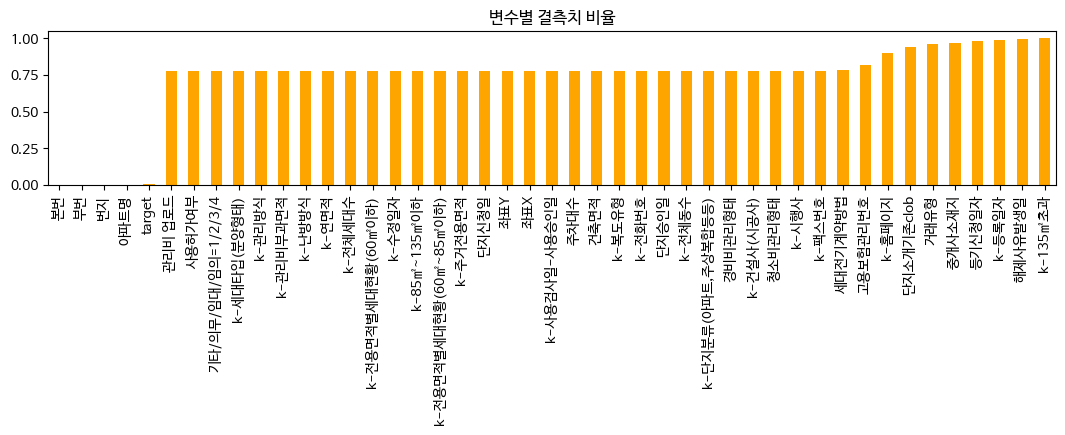

In [12]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

- 위 그래프에서 볼 수 있다시피 결측치가 100만개 이상인 칼럼들은 결측치가 해당 칼럼의 element 중 90% 이상을 차지하는 상황이 됩니다.
- 따라서 본 Baseline 에서는 이 칼럼은 예측에 도움이 되지 않는다고 판단해 삭제해주도록 하겠습니다.

In [13]:
# 위에서 결측치가 100만개 이하인 변수들만 골라 새로운 concat_select 객체로 저장해줍니다.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [14]:
concat_select.isnull().sum()     # 결측치가 100만개 초과인 칼럼이 제거된 모습은 아래와 같습니다.
# target변수는 test dataset 개수만큼(9272) 결측치가 존재함을 확인할 수 있습니다.

시군구                            0
번지                           227
본번                            75
부번                            75
아파트명                        2136
전용면적(㎡)                        0
계약년월                           0
계약일                            0
층                              0
건축년도                           0
도로명                            0
k-단지분류(아파트,주상복합등등)        877273
k-전화번호                    876850
k-팩스번호                    879348
k-세대타입(분양형태)              876125
k-관리방식                    876125
k-복도유형                    876454
k-난방방식                    876125
k-전체동수                    877207
k-전체세대수                   876125
k-건설사(시공사)                877637
k-시행사                     877834
k-사용검사일-사용승인일             876259
k-연면적                     876125
k-주거전용면적                  876170
k-관리비부과면적                 876125
k-전용면적별세대현황(60㎡이하)        876170
k-전용면적별세대현황(60㎡~85㎡이하)    876170
k-85㎡~135㎡이하              876170
k-수정일자                    876170
고용보험관리번호  

In [15]:
# 연속형 변수는 선형보간을 해주고, 범주형변수는 알수없기에 “unknown”이라고 임의로 보간해 주겠습니다.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 45 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적(㎡)                 1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  k-단지분류(아파트,주상복합등등)      250821 non-null   object 
 12  k-전화번호                  251244 non-null   object 
 13  k-팩스번호                  248746 non-null   object 
 14  k-세대타

In [16]:
# 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
concat_select['본번'] = concat_select['본번'].astype('str')
concat_select['부번'] = concat_select['부번'].astype('str')

In [17]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

- 연속형 변수와 범주형 변수가 알맞게 나누어졌는지 확인해보고, 이제 각각 보간을 진행합니다.

In [18]:
# 범주형 변수에 대한 보간
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [19]:
concat_select.isnull().sum()         # 결측치가 보간된 모습을 확인해봅니다.

시군구                       0
번지                        0
본번                        0
부번                        0
아파트명                      0
전용면적(㎡)                   0
계약년월                      0
계약일                       0
층                         0
건축년도                      0
도로명                       0
k-단지분류(아파트,주상복합등등)        0
k-전화번호                    0
k-팩스번호                    0
k-세대타입(분양형태)              0
k-관리방식                    0
k-복도유형                    0
k-난방방식                    0
k-전체동수                    0
k-전체세대수                   0
k-건설사(시공사)                0
k-시행사                     0
k-사용검사일-사용승인일             0
k-연면적                     0
k-주거전용면적                  0
k-관리비부과면적                 0
k-전용면적별세대현황(60㎡이하)        0
k-전용면적별세대현황(60㎡~85㎡이하)    0
k-85㎡~135㎡이하              0
k-수정일자                    0
고용보험관리번호                  0
경비비관리형태                   0
세대전기계약방법                  0
청소비관리형태                   0
건축면적                      0
주차대수                

- Baseline에서는 단순 결측치들을 제거하거나 보간했지만,
EDA를 통해 변수들의 흐름을 조금 더 파악하고 더 나은 interpolation 등의 방법을 고려해볼 수 있을 것 같습니다.

### 3.2. 이상치 처리
- 이번엔 이상치를 처리해봅시다.
- 이상치를 처리하는 방법은 IQR, Z-score 등 다양한 방법이 있습니다. 가장 쉽고 직관적으로 접근하는 방법은 기본 통계치를 이용하는 것입니다.
- 본 baseline에서는 IQR를 이용한 방법을 사용하겠습니다.

In [20]:
# 이상치 제거 이전의 shape은 아래와 같습니다.
print(concat_select.shape)

(1128094, 45)


In [21]:
# 이상치 제거 방법에는 IQR을 이용하겠습니다.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test data와 다시 합쳐주겠습니다.
    return result

In [25]:
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
concat_select = remove_outliers_iqr(concat_select, '전용면적(㎡)')

In [23]:
# 이상치 제거 후의 shape은 아래와 같습니다. 약 10만개의 데이터가 제거된 모습을 확인할 수 있습니다.
print(concat_select.shape)

(1128094, 45)


In [26]:
concat_select['is_test'].value_counts()     # 또한, train data만 제거되었습니다.

0    1029574
1       9272
Name: is_test, dtype: int64

## 4. Feature Engineering
- 이제 파생변수를 만들어보도록 하겠습니다.
- 파생 변수는 도메인 지식에 기반해 제작하는 것이 중요합니다.
- 주택의 가격을 예측하는 문제이기 때문에 약간의 부동산 지식을 기반으로 파생 변수를 만들어 보도록 하겠습니다.

In [27]:
# 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
concat_select['구'] = concat_select['시군구'].map(lambda x : x.split()[1])
concat_select['동'] = concat_select['시군구'].map(lambda x : x.split()[2])
del concat_select['시군구']

concat_select['계약년'] = concat_select['계약년월'].astype('str').map(lambda x : x[:4])
concat_select['계약월'] = concat_select['계약년월'].astype('str').map(lambda x : x[4:])
del concat_select['계약년월']

In [30]:
dt['구'] = dt['시군구'].map(lambda x : x.split()[1])
dt['동'] = dt['시군구'].map(lambda x : x.split()[2])

- 서울의 집값은 강남, 강북 여부에 따라 차이가 많이 난다는 사실은 많이 알려진 사실입니다.
- 따라서 강남/강북의 여부에 따라 파생변수를 생성해주도록 하겠습니다.

In [31]:
district_order = dt.groupby("구")["target"].mean().sort_values(ascending=False).index.tolist()

In [32]:
# Create a dictionary to map district names to their corresponding label encoded values
district_mapping = {district: label for label, district in enumerate(district_order)}

In [34]:
concat_select['구_encoded'] = concat_select["구"].map(district_mapping)

In [82]:
concat_select

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",...,좌표Y,단지신청일,target,is_test,구,동,계약년,계약월,구_encoded,신축여부
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,124000.0,0,강남구,개포동,2017,12,0,0
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,123500.0,0,강남구,개포동,2017,12,0,0
2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,91500.0,0,강남구,개포동,2017,12,0,0
3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,130000.0,0,강남구,개포동,2018,01,0,0
4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,117000.0,0,강남구,개포동,2018,01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,13250.0,1,중랑구,신내동,2023,07,21,1
9268,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,13250.0,1,중랑구,신내동,2023,07,21,1
9269,816,816.0,0.0,신내우디안1단지,101.65,27,12,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,13250.0,1,중랑구,신내동,2023,08,21,1
9270,816,816.0,0.0,신내우디안1단지,84.94,2,18,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,13250.0,1,중랑구,신내동,2023,09,21,1


- 또한 신축인지, 구축인지의 여부도 실거래가에 큰 영향을 줄 수 있습니다.
- 따라서 건축년도에 따라 파생변수를 제작해주도록 하겠습니다.

In [83]:
# 건축년도 분포는 아래와 같습니다. 특히 2005년이 Q3에 해당합니다.
# 2009년 이후에 지어진 건물은 10%정도 되는 것을 확인할 수 있습니다.
concat_select['건축년도'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: 건축년도, dtype: float64

In [84]:
# 따라서 2009년 이후에 지어졌으면 비교적 신축이라고 판단하고, 신축 여부 변수를 제작해보도록 하겠습니다.
concat_select['신축여부'] = concat_select['건축년도'].apply(lambda x: 1 if x >= 2009 else 0)

In [85]:
concat_select.head(1)       # 최종 데이터셋은 아래와 같습니다.

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",...,좌표Y,단지신청일,target,is_test,구,동,계약년,계약월,구_encoded,신축여부
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,124000.0,0,강남구,개포동,2017,12,0,0


In [86]:
concat_select.shape

(1038846, 49)

- 위 두 사항 외에도 외부 공공 데이터를 이용하거나, EDA를 통해 더 많은 변수를 제작할 수 있습니다.

## 5. Model Training

- 이제 위에서 만든 파생변수들과 정제한 데이터를 기반으로 본격적으로 부동산 실거래가를 예측하는 모델링을 진행하겠습니다.
- 모델링에는 `sklearn`의 `RandomForest`를 이용하도록 하겠습니다.

- 참고 ✅
  - `RandomForest`는 배깅(Bagging)의 일종으로, 학습시키는 데이터 뿐 아니라 특성변수(X)들도 무작위로 선택해 트리를 생성하는 방법입니다.
  - 모델 학습 과정에서 서로 다른 N개의 Tree 생성하고, N개의 Tree에서 발생한 Output을 Voting(범주형, 분류문제)하거나, Average(연속형, 회귀문제)해 최종 Output 생성합니다.
  - 이는 High variance, Low bias 상황에서 분산(Variance) 감소에 도움을 줍니다.

In [87]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1029574, 48) (9272, 48)


In [88]:
dt_test.head(1)

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",...,좌표X,좌표Y,단지신청일,target,구,동,계약년,계약월,구_encoded,신축여부
0,658-1,658.0,1.0,개포6차우성,79.97,26,5,1987,언주로 3,아파트,...,127.05721,37.476763,2022-11-17 10:19:06.0,13250.0,강남구,개포동,2023,07,0,0


In [89]:
# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

### 5.1. 범주형 변수 Encoding
- 범주형 변수는 그대로 모델에 투입하면, 모델이 제대로 작동할 수 없습니다.
- 따라서 **레이블 인코딩 과정**을 통해 범주형 변수들을 numeric하게 바꾸는 인코딩 과정을 진행해주도록 하겠습니다.

In [90]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

연속형 변수: ['전용면적(㎡)', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', '구_encoded', '신축여부']
범주형 변수: ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일', '구', '동', '계약년', '계약월']


In [91]:
# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|██████████| 29/29 [00:07<00:00,  3.72it/s]


In [92]:
dt_train.head(1)        # 레이블인코딩이 된 모습입니다.

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",...,좌표X,좌표Y,단지신청일,target,구,동,계약년,계약월,구_encoded,신축여부
0,4282,1114,1,293,79.97,8,3,1987,5520,3,...,127.05721,37.476763,240,124000.0,0,8,10,11,0,0


### 5.2. Model Training
- 위 데이터를 이용해 모델을 train 해보겠습니다. 모델은 RandomForest를 이용하겠습니다.
- Train과 Valid dataset을 분할하는 과정에서는 `holdout` 방법을 사용하겠습니다. 이 방법의 경우  대략적인 성능을 빠르게 확인할 수 있다는 점에서 baseline에서 사용해보도록 하겠습니다.
  - 이 후 추가적인 eda를 통해서 평가세트와 경향을 맞추거나 kfold와 같은 분포에 대한 고려를 추가할 수 있습니다.

In [93]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

In [ ]:
# Target과 독립변수들을 분리해줍니다.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [49]:
# RandomForestRegressor를 이용해 회귀 모델을 적합시키겠습니다.
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [71]:
import lightgbm as lgb

In [94]:
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

In [96]:
X_train.columns = X_train.columns.str.replace('[^\w\s]', '')
X_train.columns = X_train.columns.str.replace(' ', '_')

In [97]:
# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [98]:
# Define parameters for LGBMRegressor
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 100,
    'random_state': 1
}

# Create and train the LGBMRegressor model
model2 = lgb.LGBMRegressor(**params)
model2.fit(X_train, y_train)

# Make predictions on the validation set
pred2 = model2.predict(X_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7024
[LightGBM] [Info] Number of data points in the train set: 823659, number of used features: 47
[LightGBM] [Info] Start training from score 53170.096318


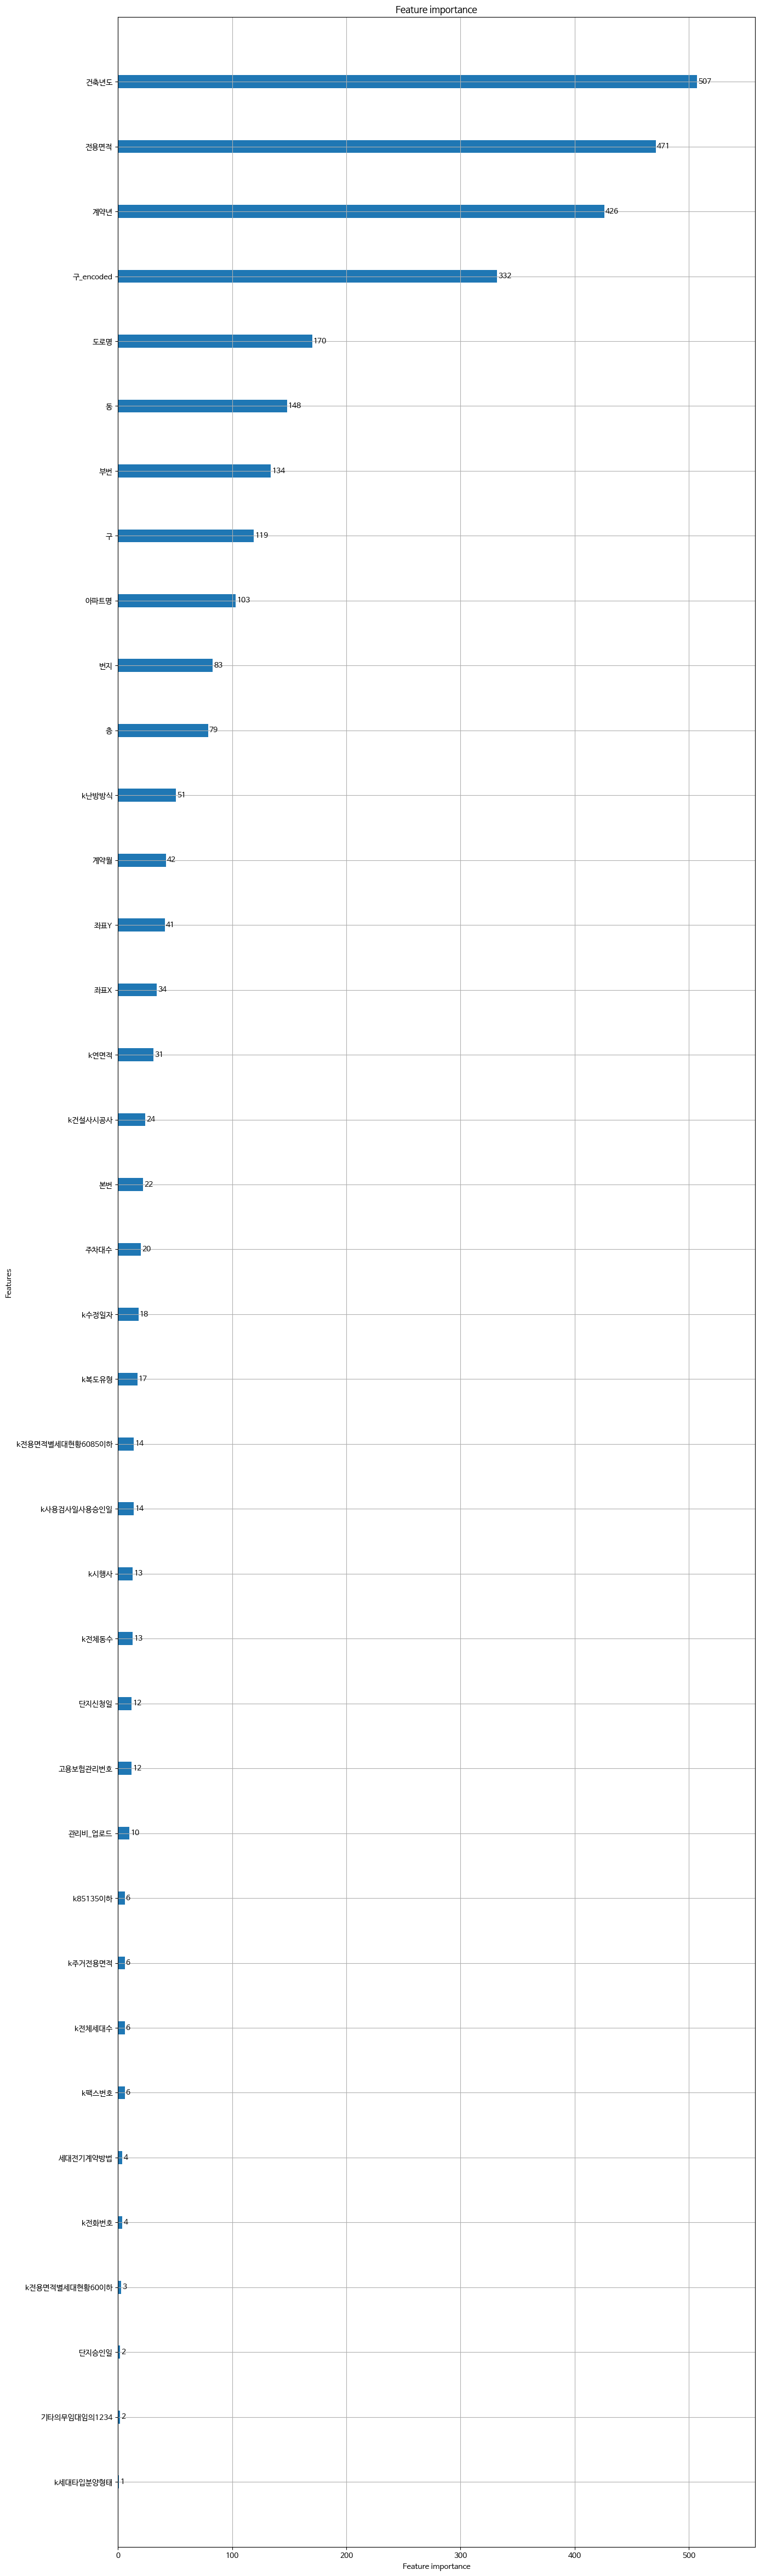

In [100]:
lgb.plot_importance(model2, max_num_features=300, importance_type='split', figsize=(15, 60))
plt.show()

- 랜덤포레스트의 하이퍼파라미터도 데이터에 맞게 지정해줄 수 있습니다. 데이터에 맞는 하이퍼파라미터를 찾는 것도 성능 향상에 도움이 될 수 있습니다.

In [99]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred2))}')

RMSE test: 11407.480317830878


In [81]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 50685.54614746838


- 변수 중요도도 확인해보도록 하겠습니다.

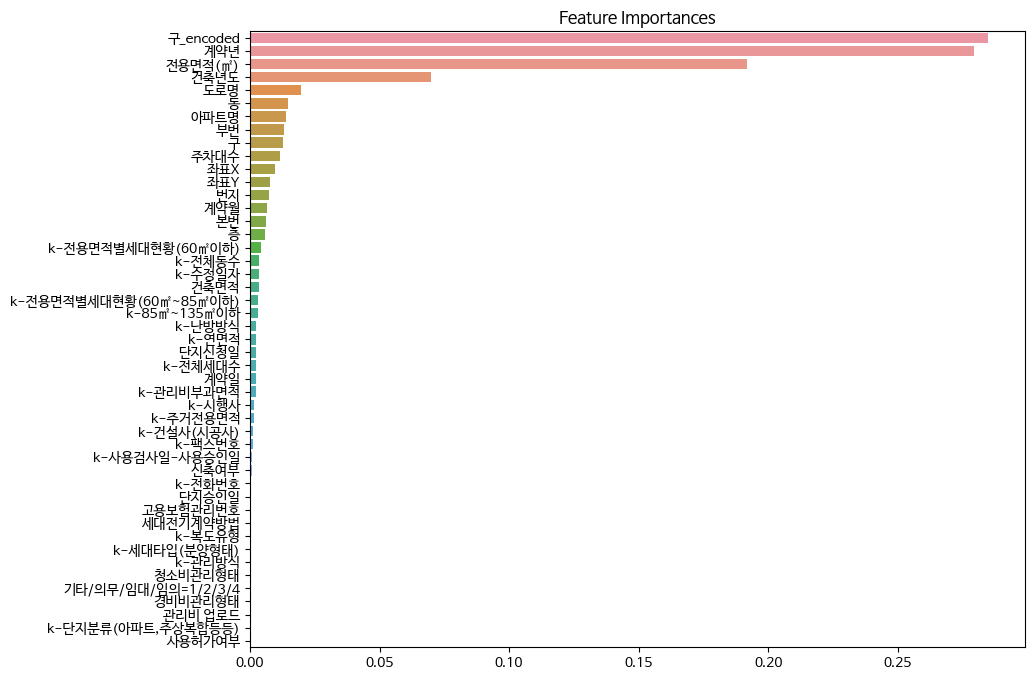

In [51]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [52]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [101]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)

### 5.3. Feature selection

- 어떤 변수가 유용한 변수인지 확인해보기 위해 permutation selection을 이용해보겠습니다.

In [53]:
# Permutation importance 방법을 변수 선택에 이용해보겠습니다.
perm = PermutationImportance(model,        # 위에서 학습된 모델을 이용하겠습니다.
                             scoring = "neg_mean_squared_error",        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid data에 대해 적합시킵니다.

Weight,Feature
962601238.6644 ± 4495800.5413,구_encoded
880593675.8110 ± 5435874.4884,계약년
506292178.1404 ± 5748045.2269,전용면적(㎡)
247915028.0841 ± 2120794.2027,건축년도
56779233.4297 ± 1134056.3799,도로명
48796161.6158 ± 478997.5266,동
46854469.6042 ± 503565.1966,아파트명
45805495.1034 ± 1038310.1326,부번
42404302.2863 ± 1208413.3355,구
22191003.4390 ± 474543.3029,좌표X


In [102]:
# Permutation importance 방법을 변수 선택에 이용해보겠습니다.
perm = PermutationImportance(model2,        # 위에서 학습된 모델을 이용하겠습니다.
                             scoring = "neg_mean_squared_error",        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid data에 대해 적합시킵니다.

Weight,Feature
788888704.5549 ± 3226469.5246,계약년
718702385.3232 ± 1456448.9719,구_encoded
388194864.3891 ± 2845051.6430,전용면적
138427263.2033 ± 774824.0775,건축년도
28140337.7358 ± 545262.0648,부번
20517934.2440 ± 441789.4524,구
16448872.9225 ± 207470.6427,도로명
12901697.7787 ± 120239.4426,층
10426125.1684 ± 116167.2243,동
9193166.6707 ± 104252.8335,k난방방식


- 분석 결과 "계약년", "전용면적" 변수가 유의한 변수로 보입니다. 따라서 이 변수로 또 다른 파생변수를 더 생성해보거나, 중요도가 낮아보이는 변수를 제거해 차원의 저주를 막아볼 수도 있습니다.

### 5.4. Valid prediction 분석

- 예측값을 분석해보기 위해 valid prediction을 확인해보겠습니다.

In [103]:
# Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
X_val['target'] = y_val
X_val['pred'] = pred2

In [104]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [105]:
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [106]:
X_val_sort.head()

,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,k단지분류아파트주상복합등등,...,단지신청일,구,동,계약년,계약월,구_encoded,신축여부,target,pred,error
223709,143,32,0,1518,114.15,23,2,2015,3990,0,...,249,0,59,15,3,0,1,488000.0,276212.803443,4.485382e+10
224096,3201,861,0,5497,84.98,17,8,1987,5243,0,...,249,0,195,15,4,0,0,430000.0,252599.651307,3.147088e+10
232766,4866,1223,0,2080,107.47,29,3,1973,5026,0,...,249,14,111,15,5,1,0,590000.0,413571.289485,3.112709e+10
203583,741,266,0,1565,110.20,27,12,1992,5791,0,...,249,0,281,16,3,0,0,380000.0,222766.652773,2.472233e+10
58002,509,164,0,5327,122.10,10,2,1982,5031,0,...,249,14,111,11,2,1,0,350000.0,196331.911909,2.361388e+10


- 예측을 잘 하지 못한 top 100개의 데이터와 예측을 잘한 top 100개의 데이터를 비교해보겠습니다.

In [107]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [108]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

KeyError: 'k-단지분류(아파트,주상복합등등)'

In [109]:
display(error_top100.head(1))
display(best_top100.head(1))

,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,k단지분류아파트주상복합등등,...,단지신청일,구,동,계약년,계약월,구_encoded,신축여부,target,pred,error
223709,1027,1027.0,0.0,래미안대치팰리스,114.15,23,2,2015,삼성로51길 37,0,...,249,0,59,15,3,0,1,488000.0,276212.803443,4.485382e+10


,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",...,단지신청일,구,동,계약년,계약월,구_encoded,신축여부,target,pred,error
458168,688,688.0,0.0,주공3,37.67,14,13,1995,강서로56나길 37,NULL,...,NULL,강서구,등촌동,2017,03,16,0,31600.0,31600.0,0.0


- 이제 분포를 비교해보도록 하겠습니다.

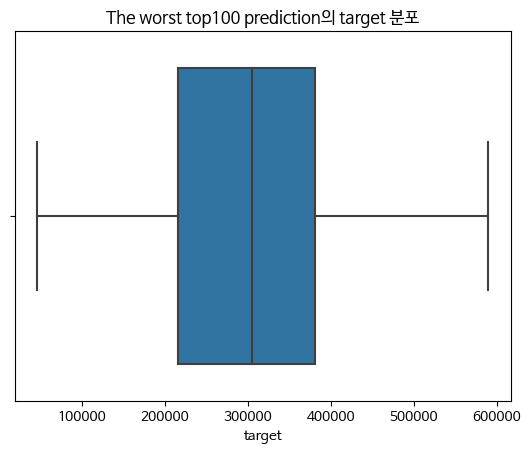

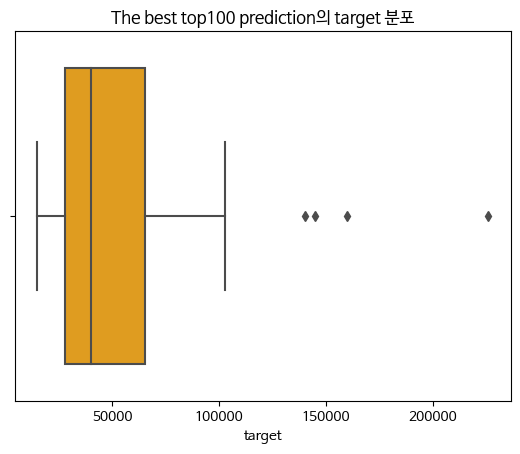

In [110]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 prediction의 target 분포')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 prediction의 target 분포')
plt.show()

- Taget 분포를 보니 좋은 예측을 보인 top 100개의 data보다 상대적으로 나쁜 예측을 보인 top 100 dataset들이 높은 가격을 보였음을 확인할 수 있습니다. 이에 대한 모델링 및 처리가 필요해보입니다.

ValueError: Could not interpret value `전용면적` for parameter `x`

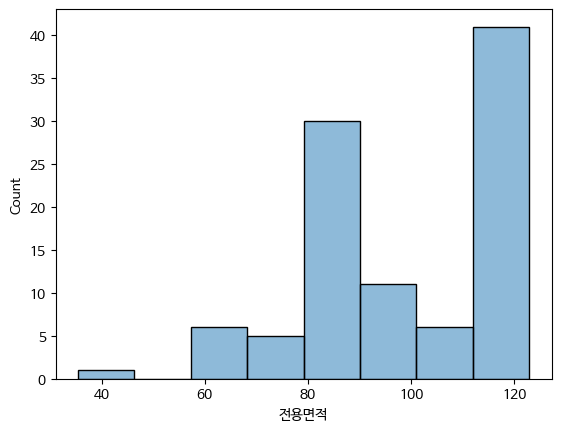

In [112]:
sns.histplot(data = error_top100, x='전용면적', alpha=0.5)
sns.histplot(data = best_top100, x='전용면적', color='orange', alpha=0.5)
plt.title('전용면적 분포 비교')
plt.show()

- 전용면적 또한 나쁜 예측을 보인 집들이 더 넓음을 확인할 수 있습니다.

## 6. Inference

In [65]:
dt_test.head(2)      # test dataset에 대한 inference를 진행해보겠습니다.

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",...,좌표X,좌표Y,단지신청일,target,구,동,계약년,계약월,구_encoded,신축여부
0,4282,1114,1,293,79.9700,26,5,1987,5520,3,...,127.057210,37.476763,240,0,0,8,16,6,0,0
1,4258,1107,1,294,108.2017,15,10,2021,431,3,...,127.056394,37.484892,236,0,0,8,16,7,0,1


In [113]:
# 저장된 모델을 불러옵니다.
with open('model2.pkl', 'rb') as f:
    model = pickle.load(f)

In [114]:
%%time
X_test = dt_test.drop(['target'], axis=1)
X_test.columns = X_test.columns.str.replace('[^\w\s]', '')
X_test.columns = X_test.columns.str.replace(' ', '_')

CPU times: user 2.8 ms, sys: 0 ns, total: 2.8 ms
Wall time: 2.8 ms


In [115]:

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)

In [116]:
real_test_pred          # 예측값들이 출력됨을 확인할 수 있습니다.

array([203927.6680483 , 279828.77575022, 246010.6329234 , ...,
        99830.37831403,  99645.3593743 ,  92200.82592658])

## 7. Output File Save

In [117]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)